In [ ]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
import random

from sklearn.metrics import mean_absolute_percentage_error
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_excel(f"Groceries_Sales_data.xlsx",index_col=0)


In [ ]:
df.head()


,Sales
Date,
2018-02-01,21199.0
2018-02-02,10634.0
2018-02-03,7966.0
2018-02-04,1353.0
2018-02-05,9497.0


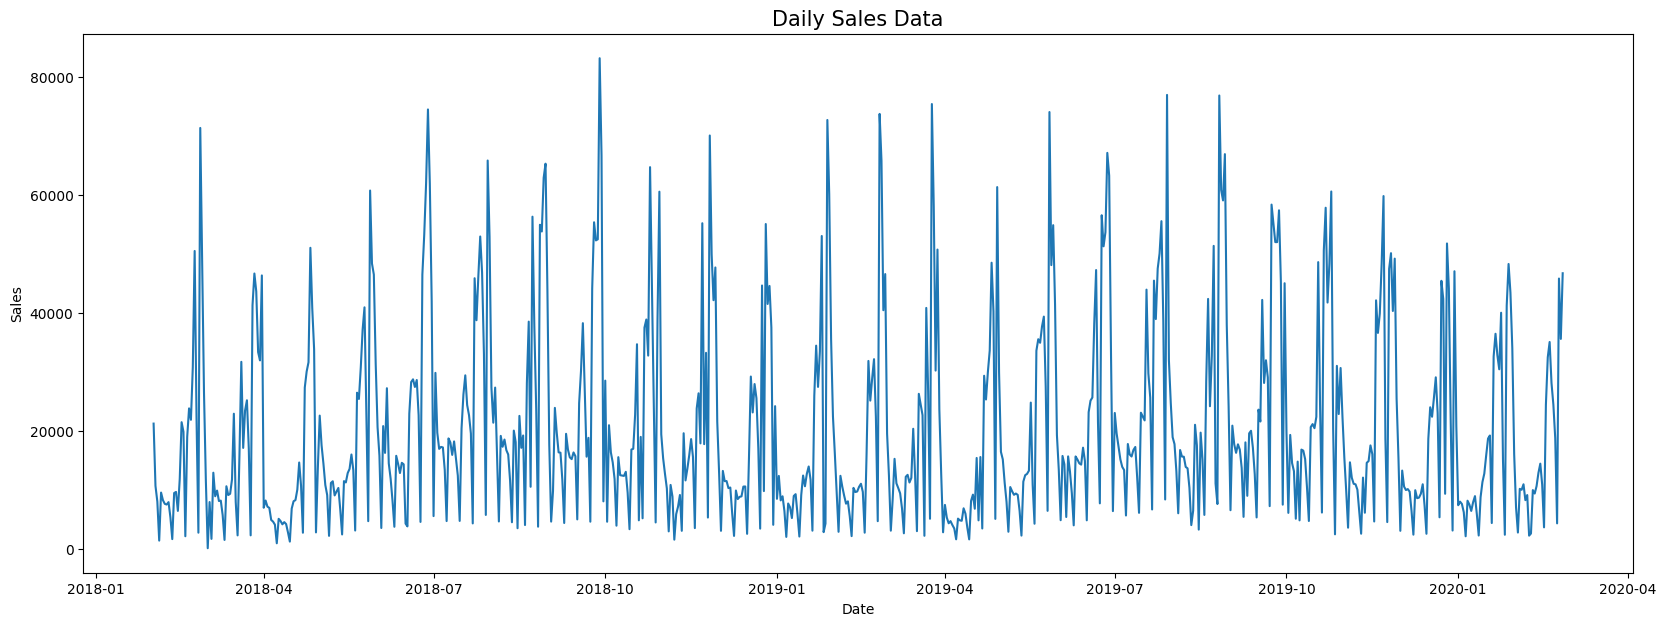

In [ ]:
fig, ax = plt.subplots(figsize=(20,7))
a = sns.lineplot(x="Date", y="Sales", data=df)
a.set_title("Daily Sales Data",fontsize=15)
plt.show()


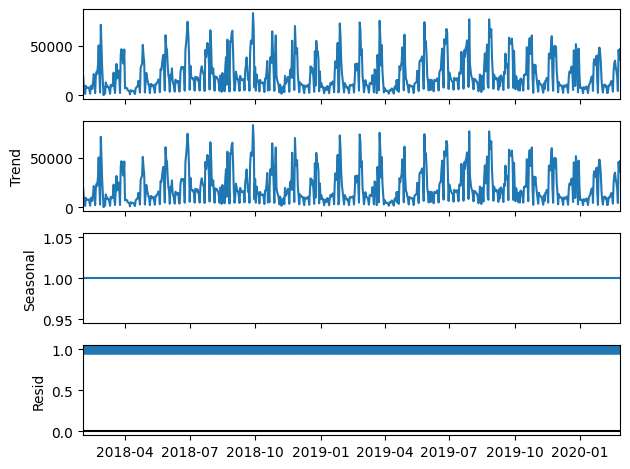

In [ ]:
result_2 = seasonal_decompose(df, model='multiplicative', period=1)
result_2.plot()
plt.show()

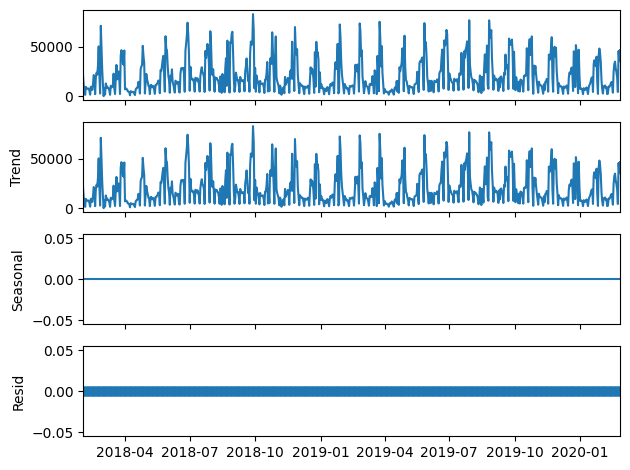

In [ ]:
result_3 = seasonal_decompose(df, model='additive', period=1)
result_3.plot()
plt.show()

In [ ]:
df.index = pd.to_datetime(df.index)

In [ ]:
df

,Sales
Date,
2018-02-01,21199.0
2018-02-02,10634.0
2018-02-03,7966.0
2018-02-04,1353.0
2018-02-05,9497.0
...,...
2020-02-22,18723.1
2020-02-23,4274.9
2020-02-24,45805.7


In [ ]:
y = df["Sales"]
y.name = "Sales"

In [ ]:
seasonal_df = y.to_frame()
seasonal_df

,Sales
Date,
2018-02-01,21199.0
2018-02-02,10634.0
2018-02-03,7966.0
2018-02-04,1353.0
2018-02-05,9497.0
...,...
2020-02-22,18723.1
2020-02-23,4274.9
2020-02-24,45805.7


In [ ]:
seasonal_df["trend"] = seasonal_df["Sales"].rolling(window=7, center=True).mean()
seasonal_df.head(10)

,Sales,trend
Date,,
2018-02-01,21199.0,NaN
2018-02-02,10634.0,NaN
2018-02-03,7966.0,NaN
2018-02-04,1353.0,9491.000000
2018-02-05,9497.0,7529.857143
2018-02-06,8207.0,7136.142857
2018-02-07,7581.0,6757.285714
2018-02-08,7471.0,6793.285714
2018-02-09,7878.0,6782.142857


In [ ]:
seasonal_df["detrended"] = seasonal_df["Sales"] - seasonal_df["trend"]
seasonal_df.head(10)

,Sales,trend,detrended
Date,,,
2018-02-01,21199.0,NaN,NaN
2018-02-02,10634.0,NaN,NaN
2018-02-03,7966.0,NaN,NaN
2018-02-04,1353.0,9491.000000,-8138.000000
2018-02-05,9497.0,7529.857143,1967.142857
2018-02-06,8207.0,7136.142857,1070.857143
2018-02-07,7581.0,6757.285714,823.714286
2018-02-08,7471.0,6793.285714,677.714286
2018-02-09,7878.0,6782.142857,1095.857143


In [ ]:
seasonal_df.index = pd.to_datetime(seasonal_df.index)
seasonal_df["month"] = seasonal_df.index.month
seasonal_df["seasonality"] = seasonal_df.groupby("month")["detrended"].transform("mean")
seasonal_df.head(15)

,Sales,trend,detrended,month,seasonality
Date,,,,,
2018-02-01,21199.0,NaN,NaN,2,-112.66203
2018-02-02,10634.0,NaN,NaN,2,-112.66203
2018-02-03,7966.0,NaN,NaN,2,-112.66203
2018-02-04,1353.0,9491.000000,-8138.000000,2,-112.66203
2018-02-05,9497.0,7529.857143,1967.142857,2,-112.66203
2018-02-06,8207.0,7136.142857,1070.857143,2,-112.66203
2018-02-07,7581.0,6757.285714,823.714286,2,-112.66203
2018-02-08,7471.0,6793.285714,677.714286,2,-112.66203
2018-02-09,7878.0,6782.142857,1095.857143,2,-112.66203


In [ ]:
seasonal_df = y.to_frame()

# calculate the trend component
seasonal_df["trend"] = seasonal_df["Sales"].rolling(window=13, center=True).mean()

# detrend the series
seasonal_df["detrended"] = seasonal_df["Sales"] - seasonal_df["trend"]

# calculate the seasonal component
seasonal_df.index = pd.to_datetime(seasonal_df.index)
seasonal_df["month"] = seasonal_df.index.month
seasonal_df["seasonality"] = seasonal_df.groupby("month")["detrended"].transform("mean")

# get the residuals
seasonal_df["resid"] = seasonal_df["detrended"] - seasonal_df["seasonality"]

# display the DF
seasonal_df.head(15)

,Sales,trend,detrended,month,seasonality,resid
Date,,,,,,
2018-02-01,21199.0,NaN,NaN,2,381.152198,NaN
2018-02-02,10634.0,NaN,NaN,2,381.152198,NaN
2018-02-03,7966.0,NaN,NaN,2,381.152198,NaN
2018-02-04,1353.0,NaN,NaN,2,381.152198,NaN
2018-02-05,9497.0,NaN,NaN,2,381.152198,NaN
2018-02-06,8207.0,NaN,NaN,2,381.152198,NaN
2018-02-07,7581.0,8287.230769,-706.230769,2,381.152198,-1087.382967
2018-02-08,7471.0,7147.930769,323.069231,2,381.152198,-58.082967
2018-02-09,7878.0,7237.546154,640.453846,2,381.152198,259.301648


array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

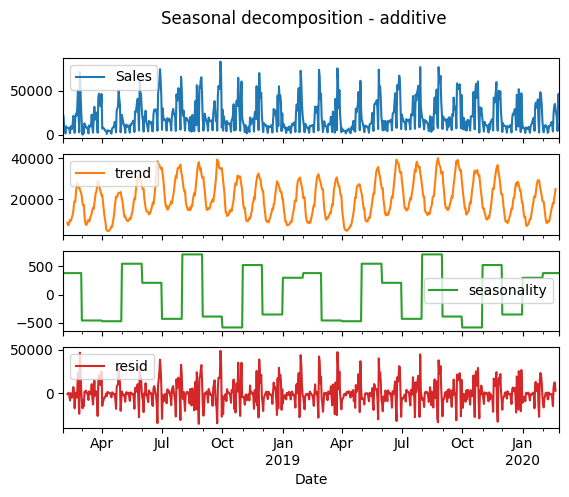

In [ ]:
seasonal_df.loc[:, ["Sales", "trend", "seasonality", "resid"]].plot(subplots=True, title="Seasonal decomposition - additive")


In [ ]:
df=df.reset_index(['Date'])


In [ ]:
df

,Date,Sales
0,2018-02-01,21199.0
1,2018-02-02,10634.0
2,2018-02-03,7966.0
3,2018-02-04,1353.0
4,2018-02-05,9497.0
...,...,...
751,2020-02-22,18723.1
752,2020-02-23,4274.9
753,2020-02-24,45805.7
754,2020-02-25,35566.3


In [ ]:
df_copy = df.copy()

df_copy['date'] = df['Date']
df_copy['month'] = df_copy['date'].dt.strftime('%B')
df_copy['year'] = df_copy['date'].dt.strftime('%Y')
df_copy['dayofweek'] = df_copy['date'].dt.strftime('%A')
df_copy['quarter'] = df_copy['date'].dt.quarter
df_copy['dayofyear'] = df_copy['date'].dt.dayofyear
df_copy['dayofmonth'] = df_copy['date'].dt.day
df_copy['weekofyear'] = df_copy['date'].dt.isocalendar().week

In [ ]:
df_copy.columns

Index(['Date', 'Sales', 'date', 'month', 'year', 'dayofweek', 'quarter',
       'dayofyear', 'dayofmonth', 'weekofyear'],
      dtype='object')

In [ ]:
X = df_copy[['dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear']]
y = df['Sales']

In [ ]:
df_new = pd.concat([X, y], axis=1)
df_new.head()

,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,Sales
0,Thursday,1,February,2018,32,1,5,21199.0
1,Friday,1,February,2018,33,2,5,10634.0
2,Saturday,1,February,2018,34,3,5,7966.0
3,Sunday,1,February,2018,35,4,5,1353.0
4,Monday,1,February,2018,36,5,6,9497.0


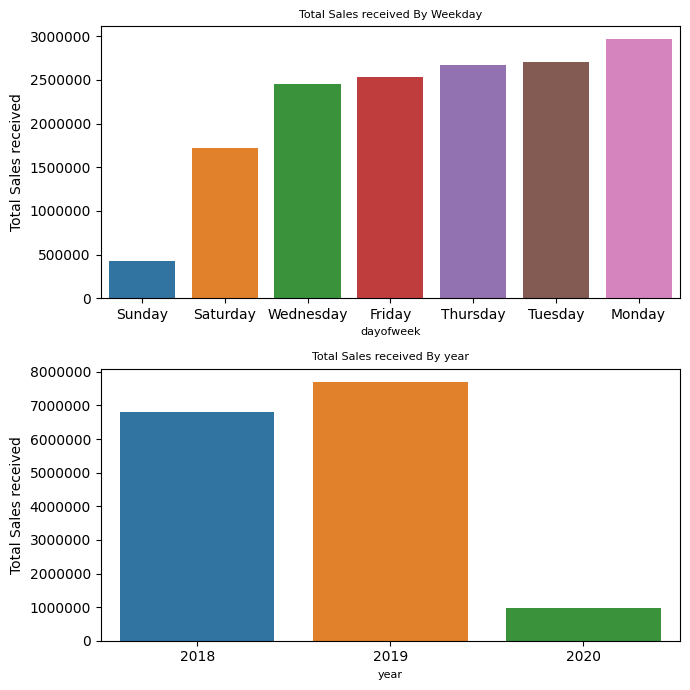

In [ ]:
fig,(ax1,ax2)= plt.subplots(nrows=2)
fig.set_size_inches(7,7)

week_day_Aggregated = pd.DataFrame(df_new.groupby("dayofweek")["Sales"].sum()).reset_index().sort_values('Sales')
sns.barplot(data=week_day_Aggregated,x="dayofweek",y="Sales",hue = 'dayofweek',ax=ax1,dodge=False)
ax1.set(xlabel='dayofweek', ylabel='Total Sales received')
ax1.xaxis.label.set_size(8)
ax1.set_title("Total Sales received By Weekday",fontsize=8)
ax1.ticklabel_format(style='plain',axis='y')
if ax1.get_legend() is not None:
    ax1.legend_.remove()


yearAggregated = pd.DataFrame(df_new.groupby("year")["Sales"].sum()).reset_index()
sns.barplot(data=yearAggregated,x="year",y="Sales",hue='year',ax=ax2)
ax2.set(xlabel='year', ylabel='Total Sales received')
ax2.xaxis.label.set_size(8)
ax2.set_title("Total Sales received By year",fontsize=8)
ax2.ticklabel_format(style='plain',axis='y')

fig.tight_layout()

In [ ]:
df=df.rename(columns={'Date':'ds','Sales':'y'})
df.tail()

,ds,y
751,2020-02-22,18723.1
752,2020-02-23,4274.9
753,2020-02-24,45805.7
754,2020-02-25,35566.3
755,2020-02-26,46703.0


In [ ]:
end_date = '2019-12-31'
X_tr = df.loc[df['ds'] <= end_date]
X_tst = df.loc[df['ds'] > end_date]

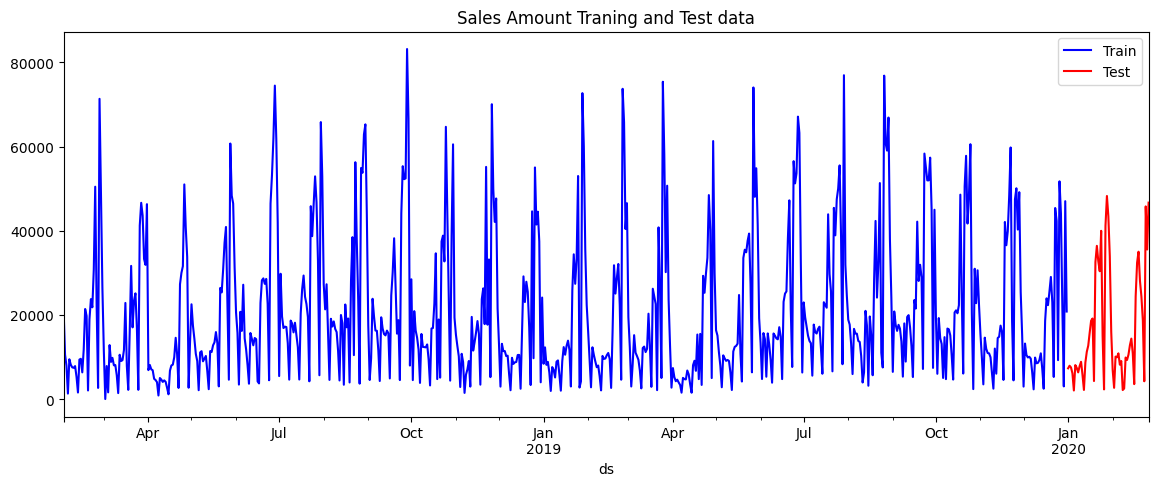

In [ ]:
pd.plotting.register_matplotlib_converters()
f, ax = plt.subplots(figsize=(14,5))
X_tr.plot(kind='line', x='ds', y='y', color='blue', label='Train', ax=ax)
X_tst.plot(kind='line', x='ds', y='y', color='red', label='Test', ax=ax)
plt.title('Sales Amount Traning and Test data')
plt.show()

In [ ]:
model =Prophet()
model.fit(X_tr)


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/kldk8nmj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/9k8ibxpj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66935', 'data', 'file=/tmp/tmpfd2sn_v5/kldk8nmj.json', 'init=/tmp/tmpfd2sn_v5/9k8ibxpj.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelxohh8b4i/prophet_model-20240723110940.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:09:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:09:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
len(X_tst)

57

In [ ]:
X_tst

,ds,y
699,2020-01-01,7353.6
700,2020-01-02,7959.7
701,2020-01-03,7559.3
702,2020-01-04,6162.3
703,2020-01-05,2085.9
704,2020-01-06,8120.0
705,2020-01-07,7464.4
706,2020-01-08,6385.6
707,2020-01-09,7873.0
708,2020-01-10,8899.9


In [ ]:
future = model.make_future_dataframe(periods=57, freq='D')
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2018-02-01,22918.473941,3107.396859,42825.259921
1,2018-02-02,21609.554668,1763.917201,40361.418428
2,2018-02-03,14076.387315,-5736.198205,32680.634052
3,2018-02-04,1669.011765,-18196.005804,20180.751734
4,2018-02-05,25535.083176,6171.619878,43732.858995


In [ ]:
future_2 = model.make_future_dataframe(periods=60)
forecast_2 = model.predict(future_2)
forecast_2[['ds', 'yhat']].tail(5)

,ds,yhat
754,2020-02-25,27945.349608
755,2020-02-26,25546.363061
756,2020-02-27,28114.586689
757,2020-02-28,26805.667405
758,2020-02-29,19272.500042


In [ ]:
X_tst_forecast = model.predict(X_tst)
X_tst_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
50,2020-02-20,28066.474534,9247.956436,47854.268032
51,2020-02-21,26757.555250,7876.660920,45580.608101
52,2020-02-22,19224.387887,241.652794,38015.081127
53,2020-02-23,6817.012325,-12312.451790,24769.550223
54,2020-02-24,30683.083725,11384.521974,49389.378156
55,2020-02-25,27945.349608,8106.617170,48433.023918
56,2020-02-26,25546.363061,6399.935747,45051.028093


In [ ]:
X_tst_forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-01,23212.897455,6493.451480,44573.306989,23212.897455,23212.897455,1948.568368,1948.568368,1948.568368,1948.568368,1948.568368,1948.568368,0.0,0.0,0.0,25161.465823
1,2020-01-02,23219.770620,7411.706790,46711.250733,23219.770620,23219.770620,4509.918830,4509.918830,4509.918830,4509.918830,4509.918830,4509.918830,0.0,0.0,0.0,27729.689451
2,2020-01-03,23226.643785,8719.954400,46597.890552,23226.643785,23226.643785,3194.126381,3194.126381,3194.126381,3194.126381,3194.126381,3194.126381,0.0,0.0,0.0,26420.770167
3,2020-01-04,23233.516950,-1600.665127,37814.927101,23233.516950,23233.516950,-4345.914147,-4345.914147,-4345.914147,-4345.914147,-4345.914147,-4345.914147,0.0,0.0,0.0,18887.602803
4,2020-01-05,23240.390115,-13241.696119,25458.867841,23240.390115,23240.390115,-16760.162873,-16760.162873,-16760.162873,-16760.162873,-16760.162873,-16760.162873,0.0,0.0,0.0,6480.227242
5,2020-01-06,23247.263280,11973.989185,50584.550204,23247.263280,23247.263280,7099.035362,7099.035362,7099.035362,7099.035362,7099.035362,7099.035362,0.0,0.0,0.0,30346.298642
6,2020-01-07,23254.136445,8722.792133,46539.085994,23254.136445,23254.136446,4354.428080,4354.428080,4354.428080,4354.428080,4354.428080,4354.428080,0.0,0.0,0.0,27608.564525
7,2020-01-08,23261.009610,5475.469408,44244.769501,23261.009610,23261.009612,1948.568368,1948.568368,1948.568368,1948.568368,1948.568368,1948.568368,0.0,0.0,0.0,25209.577978
8,2020-01-09,23267.882775,7854.166473,47809.308590,23267.882774,23267.882778,4509.918830,4509.918830,4509.918830,4509.918830,4509.918830,4509.918830,0.0,0.0,0.0,27777.801606
9,2020-01-10,23274.755940,7683.176180,46032.375987,23274.755938,23274.755945,3194.126381,3194.126381,3194.126381,3194.126381,3194.126381,3194.126381,0.0,0.0,0.0,26468.882322


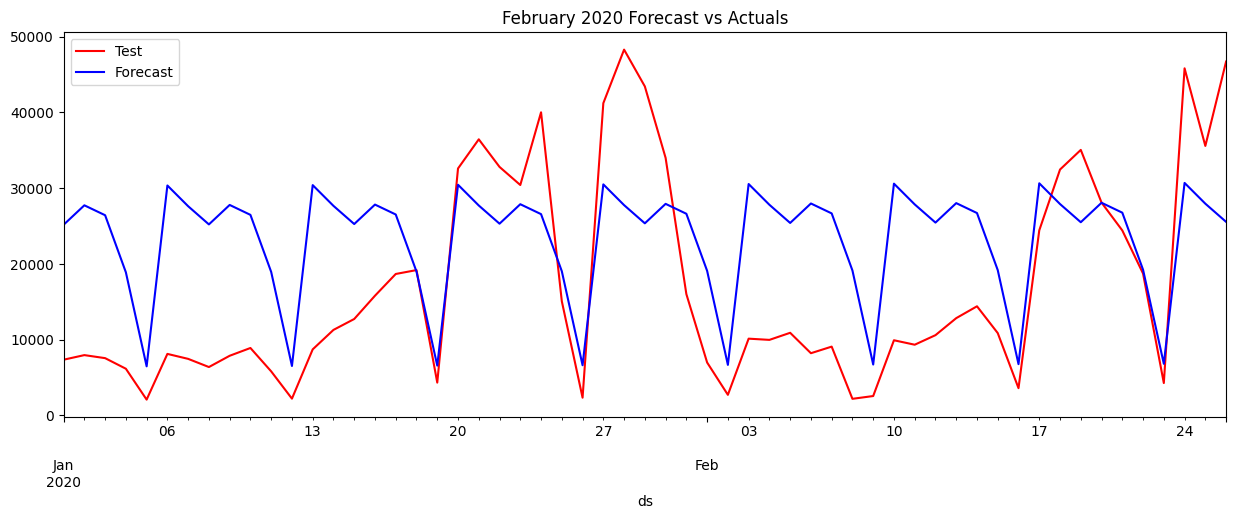

In [ ]:
f, ax = plt.subplots(figsize=(14,5))
f.set_figheight(5)
f.set_figwidth(15)
X_tst.plot(kind='line',x='ds', y='y', color='red', label='Test', ax=ax)
X_tst_forecast.plot(kind='line',x='ds',y='yhat', color='blue',label='Forecast', ax=ax)
plt.title('February 2020 Forecast vs Actuals')
plt.show()

In [ ]:
mape = mean_absolute_percentage_error(X_tst['y'],X_tst_forecast['yhat'])
print("MAPE",mape)

MAPE 1.2952508075863325


In [ ]:
import holidays

In [ ]:
india_holidays = holidays.India(years = 2018)

holiday_data = []

for date, name in sorted(india_holidays.items()):
    print(date, name)
    holiday_data.append({'ds': date, 'holiday': name})

# Convert the list to a DataFrame
holiday_india_df = pd.DataFrame(holiday_data)


2018-01-14 Makar Sankranti / Pongal
2018-01-26 Republic Day
2018-03-02 Holi
2018-03-25 Palm Sunday
2018-03-30 Good Friday
2018-04-01 Easter Sunday
2018-05-01 Labour Day
2018-05-20 Feast of Pentecost
2018-06-15 Eid ul-Fitr (estimated)
2018-06-16 Eid ul-Fitr (estimated)
2018-08-15 Independence Day
2018-08-21 Eid al-Adha (estimated)
2018-08-22 Eid al-Adha (estimated)
2018-09-20 Day of Ashura (estimated)
2018-10-02 Gandhi Jayanti
2018-11-07 Diwali
2018-11-20 Mawlid (estimated)
2018-12-25 Christmas Day


In [ ]:
holiday_india_df


,ds,holiday
0,2018-01-14,Makar Sankranti / Pongal
1,2018-01-26,Republic Day
2,2018-03-02,Holi
3,2018-03-25,Palm Sunday
4,2018-03-30,Good Friday
5,2018-04-01,Easter Sunday
6,2018-05-01,Labour Day
7,2018-05-20,Feast of Pentecost
8,2018-06-15,Eid ul-Fitr (estimated)
9,2018-06-16,Eid ul-Fitr (estimated)


In [ ]:
india_holidays_mh = holidays.India(years = 2018,subdiv='MH')

holiday_india = []

for date, name in sorted(india_holidays_mh.items()):
    print(date, name)
    holiday_india.append({'ds': date, 'holiday': name})

holiday_india_mh = pd.DataFrame(holiday_india)

2018-01-14 Makar Sankranti / Pongal
2018-01-26 Republic Day
2018-03-02 Holi
2018-03-25 Palm Sunday
2018-03-30 Good Friday
2018-04-01 Easter Sunday
2018-04-14 Dr. B. R. Ambedkar's Jayanti
2018-05-01 Labour Day; Maharashtra Day
2018-05-20 Feast of Pentecost
2018-06-15 Eid ul-Fitr (estimated)
2018-06-16 Eid ul-Fitr (estimated)
2018-08-15 Independence Day
2018-08-21 Eid al-Adha (estimated)
2018-08-22 Eid al-Adha (estimated)
2018-09-20 Day of Ashura (estimated)
2018-10-02 Gandhi Jayanti
2018-10-15 Dussehra
2018-11-07 Diwali
2018-11-20 Mawlid (estimated)
2018-12-25 Christmas Day


In [ ]:
holiday_india_mh


,ds,holiday
0,2018-01-14,Makar Sankranti / Pongal
1,2018-01-26,Republic Day
2,2018-03-02,Holi
3,2018-03-25,Palm Sunday
4,2018-03-30,Good Friday
5,2018-04-01,Easter Sunday
6,2018-04-14,Dr. B. R. Ambedkar's Jayanti
7,2018-05-01,Labour Day; Maharashtra Day
8,2018-05-20,Feast of Pentecost
9,2018-06-15,Eid ul-Fitr (estimated)


In [ ]:
holiday_1 = []
for date, name in sorted(holidays.UnitedStates(years=[2018,2019,2020]).items()):
    holiday_1.append({'ds': date, 'holiday': "US-Holidays"})
holiday = pd.DataFrame(holiday_1)

# Convert the 'ds' column to datetime format
holiday['ds'] = pd.to_datetime(holiday['ds'], format='%Y-%m-%d', errors='ignore')

In [ ]:
holiday

,ds,holiday
0,2018-01-01,US-Holidays
1,2018-01-15,US-Holidays
2,2018-02-19,US-Holidays
3,2018-05-28,US-Holidays
4,2018-07-04,US-Holidays
5,2018-09-03,US-Holidays
6,2018-10-08,US-Holidays
7,2018-11-11,US-Holidays
8,2018-11-12,US-Holidays
9,2018-11-22,US-Holidays


In [ ]:
holiday_2 = []

for date, name in sorted(holidays.India(years=[2018,2019,2020]).items()):
    holiday_2.append({'ds': date, 'holiday': "India-Holidays"})

holiday_2_df = pd.DataFrame(holiday_2)

# Convert the 'ds' column to datetime format
holiday_2_df['ds'] = pd.to_datetime(holiday_2_df['ds'], format='%Y-%m-%d', errors='ignore')

In [ ]:
m_2 = Prophet()
m_2.add_country_holidays(country_name='IN')
m_2.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/kelofys5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/h0liv7dj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85635', 'data', 'file=/tmp/tmpfd2sn_v5/kelofys5.json', 'init=/tmp/tmpfd2sn_v5/h0liv7dj.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_model_5ggsazf/prophet_model-20240723110941.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:09:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:09:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
m_2.train_holiday_names

0      Makar Sankranti / Pongal
1                  Republic Day
2              Independence Day
3                Gandhi Jayanti
4                    Labour Day
5                        Diwali
6                          Holi
7     Day of Ashura (estimated)
8            Mawlid (estimated)
9       Eid ul-Fitr (estimated)
10      Eid al-Adha (estimated)
11                  Palm Sunday
12                  Good Friday
13                Easter Sunday
14           Feast of Pentecost
15                Christmas Day
dtype: object

In [ ]:
model_with_holidays = Prophet(holidays=holiday)
model_with_holidays.fit(X_tr)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/3vzd_6iw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/yfu8w6oy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67245', 'data', 'file=/tmp/tmpfd2sn_v5/3vzd_6iw.json', 'init=/tmp/tmpfd2sn_v5/yfu8w6oy.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelwe2rv_ub/prophet_model-20240723110941.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:09:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:09:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future_holiday = model_with_holidays.make_future_dataframe(periods=57, freq='D')
forecast_holiday = model_with_holidays.predict(future_holiday)
forecast_holiday[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
749,2020-02-20,28244.407248,8634.695417,46658.439528
750,2020-02-21,26893.953958,7722.276335,46052.966095
751,2020-02-22,19356.400851,83.509390,38878.357519
752,2020-02-23,6955.481209,-12507.305679,25283.333713
753,2020-02-24,30969.646063,12569.893899,49058.690701
754,2020-02-25,28108.442406,9914.369994,48633.714401
755,2020-02-26,25710.999870,5233.951798,45550.857435


In [ ]:
X_tst_forecast_holiday = model_with_holidays.predict(X_tst)
X_tst_forecast_holiday[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
50,2020-02-20,28244.407248,9338.809975,47753.315798
51,2020-02-21,26893.953958,8686.843985,46058.067577
52,2020-02-22,19356.400851,-877.021138,38991.007902
53,2020-02-23,6955.481209,-12415.879322,27516.760349
54,2020-02-24,30969.646063,13271.135912,49284.028226
55,2020-02-25,28108.442406,7926.842526,48314.265537
56,2020-02-26,25710.999870,6339.984114,43508.206872


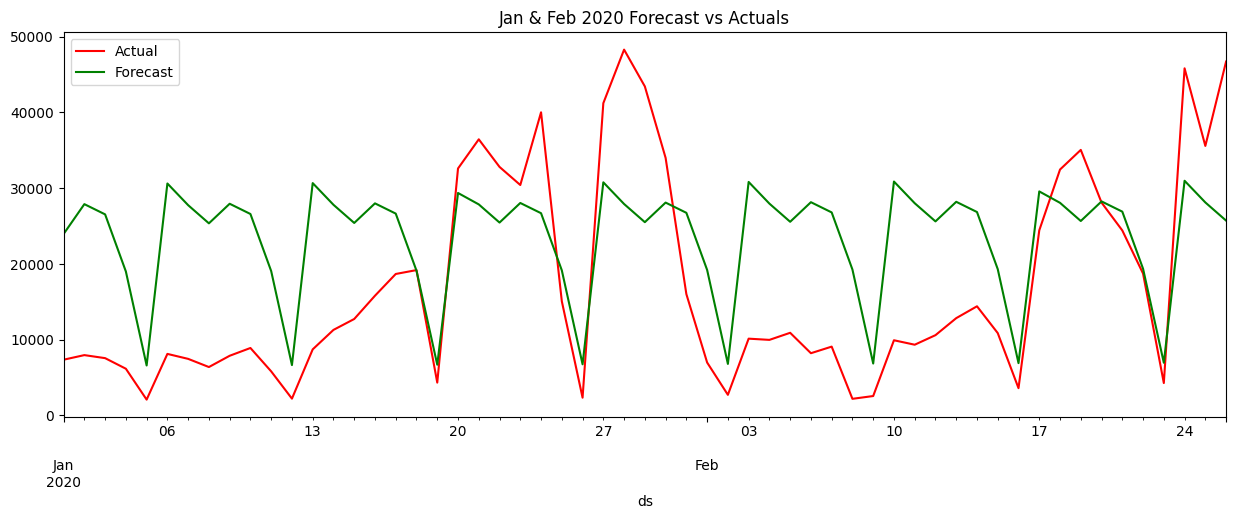

In [ ]:
f, ax = plt.subplots(figsize=(14,5))
f.set_figheight(5)
f.set_figwidth(15)
X_tst.plot(kind='line',x='ds', y='y', color='red', label='Actual', ax=ax)
X_tst_forecast_holiday.plot(kind='line',x='ds',y='yhat', color='green',label='Forecast', ax=ax)
plt.title('Jan & Feb 2020 Forecast vs Actuals')
plt.show()

In [ ]:
mape_holiday = mean_absolute_percentage_error(X_tst['y'],X_tst_forecast_holiday['yhat'])
print("MAPE",round(mape_holiday,4))

MAPE 1.3068


In [ ]:
from sklearn.model_selection import ParameterGrid
params_grid = {'seasonality_mode':('multiplicative','additive'),
               'changepoint_prior_scale':[0.1,0.2,0.3],
              'holidays_prior_scale':[0.1,0.2,0.3],
              'n_changepoints' : [100,150]}
grid = ParameterGrid(params_grid)
cnt = 0
for p in grid:
    cnt = cnt+1

print('Total Possible Models',cnt)

Total Possible Models 36


In [ ]:
%%timeit
strt = '2019-12-31'
end = '2020-02-26'
model_parameters = []

# Assuming 'grid' is defined elsewhere and is a list of parameter dictionaries
for p in grid:
    test = pd.DataFrame()
    print(p)
    random.seed(0)
    train_model = Prophet(changepoint_prior_scale=p['changepoint_prior_scale'],
                          holidays_prior_scale=p['holidays_prior_scale'],
                          n_changepoints=p['n_changepoints'],
                          seasonality_mode=p['seasonality_mode'],
                          weekly_seasonality=True,
                          daily_seasonality=True,
                          yearly_seasonality=True,
                          holidays=holiday,
                          interval_width=0.95)
    train_model.add_country_holidays(country_name='US')
    train_model.fit(X_tr)  # Ensure X_tr is defined

    train_forecast = train_model.make_future_dataframe(periods=57, freq='D', include_history=False)
    train_forecast = train_model.predict(train_forecast)
    test = train_forecast[['ds', 'yhat']]
    Actual = df[(df['ds'] > strt) & (df['ds'] <= end)]  # Ensure df is defined
    MAPE = mean_absolute_percentage_error(Actual['y'], abs(test['yhat']))
    print('Mean Absolute Percentage Error (MAPE)-------------------', MAPE)
    model_parameters.append({'MAPE': MAPE, 'Parameters': p})

# Convert list to DataFrame
model_parameters_df = pd.DataFrame(model_parameters)

# Sort by MAPE and reset the index
parameters = model_parameters_df.sort_values(by=['MAPE'])
parameters = parameters.reset_index(drop=True)

# Display the top parameters
print(parameters.head())

DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/7wn2cva9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/rn8lj1uu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59535', 'data', 'file=/tmp/tmpfd2sn_v5/7wn2cva9.json', 'init=/tmp/tmpfd2sn_v5/rn8lj1uu.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modela7a1vqp2/prophet_model-20240723110942.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:09:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


11:09:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/ix_8zjge.json


Mean Absolute Percentage Error (MAPE)------------------- 1.0531951037835974
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/uwt2vobb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60269', 'data', 'file=/tmp/tmpfd2sn_v5/ix_8zjge.json', 'init=/tmp/tmpfd2sn_v5/uwt2vobb.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modeliuzhm9eb/prophet_model-20240723110943.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:09:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:09:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/6ozqvxh4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/8alurbms.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.b

Mean Absolute Percentage Error (MAPE)------------------- 1.0471307845436277
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


11:09:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/hbfupjxa.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/vftkalta.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88458', 'data', 'file=/tmp/tmpfd2sn_v5/hbfupjxa.json', 'init=/tmp/tmpfd2sn_v5/vftkalta.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelec634kza/prophet_model-20240723110944.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:09:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0492091623916695
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


11:09:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/aqwpl22i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/6vm48gk9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66806', 'data', 'file=/tmp/tmpfd2sn_v5/aqwpl22i.json', 'init=/tmp/tmpfd2sn_v5/6vm48gk9.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelypi41mdx/prophet_model-20240723110944.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:09:44 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0568429806109756
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:Chain [1] start processing
11:09:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/8qn3irxj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/36gyw2i_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56618', 'data', 'file=/tmp/tmpfd2sn_v5/8qn3irxj.json', 'init=/tmp/tmpfd2sn_v5/36gyw2i_.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelu_9vf7cg/prophet_model-20240723110945.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:09:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.03165107620436
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


11:09:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/1agm5e41.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/pyyk8e82.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95484', 'data', 'file=/tmp/tmpfd2sn_v5/1agm5e41.json', 'init=/tmp/tmpfd2sn_v5/pyyk8e82.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelvyjpd9y1/prophet_model-20240723110945.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:09:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0490607232536082
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


11:09:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/7ijhohpe.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/5799ufok.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1782', 'data', 'file=/tmp/tmpfd2sn_v5/7ijhohpe.json', 'init=/tmp/tmpfd2sn_v5/5799ufok.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelemyungq9/prophet_model-20240723110946.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:09:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0481192026094646
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


11:09:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/osrqzwno.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/nlfib48b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61397', 'data', 'file=/tmp/tmpfd2sn_v5/osrqzwno.json', 'init=/tmp/tmpfd2sn_v5/nlfib48b.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_model2qs76be5/prophet_model-20240723110946.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:09:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0466606859459016
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


11:09:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/kqz7pxr2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/db608oio.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76164', 'data', 'file=/tmp/tmpfd2sn_v5/kqz7pxr2.json', 'init=/tmp/tmpfd2sn_v5/db608oio.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelcfo32rh0/prophet_model-20240723110947.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:09:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.045222357645189
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


11:09:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/z892484w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/bylztk8f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38126', 'data', 'file=/tmp/tmpfd2sn_v5/z892484w.json', 'init=/tmp/tmpfd2sn_v5/bylztk8f.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelyzk30730/prophet_model-20240723110947.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:09:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.045996240046227
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


11:09:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/vkpe8zo1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/lrs_i6_z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=562', 'data', 'file=/tmp/tmpfd2sn_v5/vkpe8zo1.json', 'init=/tmp/tmpfd2sn_v5/lrs_i6_z.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelpqshcovb/prophet_model-20240723110947.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:09:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0265425334201896
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


11:09:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/ihb587bn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/cwuq6ujv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62168', 'data', 'file=/tmp/tmpfd2sn_v5/ihb587bn.json', 'init=/tmp/tmpfd2sn_v5/cwuq6ujv.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_model_q1fom4z/prophet_model-20240723110948.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:09:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0318022741191823
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


11:09:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/t2nii_74.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/lwa9diff.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20733', 'data', 'file=/tmp/tmpfd2sn_v5/t2nii_74.json', 'init=/tmp/tmpfd2sn_v5/lwa9diff.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelmrruvgi5/prophet_model-20240723110948.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:09:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0446062998919567
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


11:09:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/hu4ej27v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/kmac09v4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34050', 'data', 'file=/tmp/tmpfd2sn_v5/hu4ej27v.json', 'init=/tmp/tmpfd2sn_v5/kmac09v4.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelrk16hejf/prophet_model-20240723110948.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:09:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.040196384294176
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


11:09:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/lkh49wiu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/2yddpuup.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75597', 'data', 'file=/tmp/tmpfd2sn_v5/lkh49wiu.json', 'init=/tmp/tmpfd2sn_v5/2yddpuup.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modeleerni5er/prophet_model-20240723110949.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:09:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0483373192003504
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


11:09:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/wtym78sc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/4kos32q_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67536', 'data', 'file=/tmp/tmpfd2sn_v5/wtym78sc.json', 'init=/tmp/tmpfd2sn_v5/4kos32q_.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_model5v8ubfzc/prophet_model-20240723110949.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:09:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0407562417146214
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


11:09:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/d3_g7k5s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/o278741j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7287', 'data', 'file=/tmp/tmpfd2sn_v5/d3_g7k5s.json', 'init=/tmp/tmpfd2sn_v5/o278741j.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelxh_c_4vz/prophet_model-20240723110949.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:09:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0580333479081496
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


11:09:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/f6pvcjep.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/y2xwvp25.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24758', 'data', 'file=/tmp/tmpfd2sn_v5/f6pvcjep.json', 'init=/tmp/tmpfd2sn_v5/y2xwvp25.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_model1sh6ua90/prophet_model-20240723110950.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:09:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0340974480893912
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


11:09:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/44mdwoor.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/pju8070k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90761', 'data', 'file=/tmp/tmpfd2sn_v5/44mdwoor.json', 'init=/tmp/tmpfd2sn_v5/pju8070k.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_model01pm5iml/prophet_model-20240723110950.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:09:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0549781543709622
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


11:09:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/y1j1id1_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/x2e4uve0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98947', 'data', 'file=/tmp/tmpfd2sn_v5/y1j1id1_.json', 'init=/tmp/tmpfd2sn_v5/x2e4uve0.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelbt4penpt/prophet_model-20240723110950.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:09:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.035431974944253
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


11:09:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/xa8mk744.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/_0q8j36z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38718', 'data', 'file=/tmp/tmpfd2sn_v5/xa8mk744.json', 'init=/tmp/tmpfd2sn_v5/_0q8j36z.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_model2vofcmaa/prophet_model-20240723110951.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:09:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.031906181469197
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


11:09:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/1jtttztw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/7gisj61z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19954', 'data', 'file=/tmp/tmpfd2sn_v5/1jtttztw.json', 'init=/tmp/tmpfd2sn_v5/7gisj61z.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_model_068v8mv/prophet_model-20240723110951.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:09:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0313103267514752
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


11:09:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/9rshq1jp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/phlr6bw5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18239', 'data', 'file=/tmp/tmpfd2sn_v5/9rshq1jp.json', 'init=/tmp/tmpfd2sn_v5/phlr6bw5.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_model40gk_4t8/prophet_model-20240723110951.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:09:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0406716851268607
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


11:09:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/ih37bp1o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/e84b_66_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86994', 'data', 'file=/tmp/tmpfd2sn_v5/ih37bp1o.json', 'init=/tmp/tmpfd2sn_v5/e84b_66_.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelxwm_djzk/prophet_model-20240723110952.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:09:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0342615608128498
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


11:09:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/cw71tql0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/7_ax1l3a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59060', 'data', 'file=/tmp/tmpfd2sn_v5/cw71tql0.json', 'init=/tmp/tmpfd2sn_v5/7_ax1l3a.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modell1bek40h/prophet_model-20240723110952.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:09:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:09:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0103379578810252
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/xhqx3u1s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/_wxuz2ty.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42304', 'data', 'file=/tmp/tmpfd2sn_v5/xhqx3u1s.json', 'init=/tmp/tmpfd2sn_v5/_wxuz2ty.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_model6ldko5qj/prophet_model-20240723110953.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:09:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.05717505817574
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


11:09:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/57on7fc9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/ex6c3ef9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11072', 'data', 'file=/tmp/tmpfd2sn_v5/57on7fc9.json', 'init=/tmp/tmpfd2sn_v5/ex6c3ef9.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelgrs7_fvu/prophet_model-20240723110953.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:09:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0259851935168647
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


11:09:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/ipmhfvtz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/e7v49_n0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43246', 'data', 'file=/tmp/tmpfd2sn_v5/ipmhfvtz.json', 'init=/tmp/tmpfd2sn_v5/e7v49_n0.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_model79fuijzr/prophet_model-20240723110953.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:09:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0390043135119076
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


11:09:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/357j0awi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/hw59pykf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67835', 'data', 'file=/tmp/tmpfd2sn_v5/357j0awi.json', 'init=/tmp/tmpfd2sn_v5/hw59pykf.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelo4e7m7v5/prophet_model-20240723110954.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:09:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:09:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------- 1.028226838646312
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/fhiv3bzl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/4z7a5ouj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98821', 'data', 'file=/tmp/tmpfd2sn_v5/fhiv3bzl.json', 'init=/tmp/tmpfd2sn_v5/4z7a5ouj.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelrtau6ryk/prophet_model-20240723110954.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:09:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0808553220059287
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


11:09:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/vt4zw3n7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/t4m4kxoj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85494', 'data', 'file=/tmp/tmpfd2sn_v5/vt4zw3n7.json', 'init=/tmp/tmpfd2sn_v5/t4m4kxoj.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelkvkzp3xo/prophet_model-20240723110955.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:09:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0461696402363099
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


11:09:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/v6_bnfyz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/ldotgfy6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49364', 'data', 'file=/tmp/tmpfd2sn_v5/v6_bnfyz.json', 'init=/tmp/tmpfd2sn_v5/ldotgfy6.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_model8e2akpfo/prophet_model-20240723110955.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:09:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0317024675909539
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


11:09:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/6rcbfp8g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/e423quty.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8061', 'data', 'file=/tmp/tmpfd2sn_v5/6rcbfp8g.json', 'init=/tmp/tmpfd2sn_v5/e423quty.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelq1z30mq7/prophet_model-20240723110956.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:09:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0179654601962016
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


11:09:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/ky2f18vo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/k_5r3x73.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10306', 'data', 'file=/tmp/tmpfd2sn_v5/ky2f18vo.json', 'init=/tmp/tmpfd2sn_v5/k_5r3x73.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelwor58_bu/prophet_model-20240723110956.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:09:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0814894220093145
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


11:09:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/w7kaf35g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/whg5ap11.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12109', 'data', 'file=/tmp/tmpfd2sn_v5/w7kaf35g.json', 'init=/tmp/tmpfd2sn_v5/whg5ap11.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelruzht2s_/prophet_model-20240723110957.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:09:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0276037970870002
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


11:09:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/_mtnoxd2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/n_2qs0is.json
DEBUG:cmdstanpy:idx 0


Mean Absolute Percentage Error (MAPE)------------------- 1.038305615887082
       MAPE                                         Parameters
0  1.010338  {'changepoint_prior_scale': 0.3, 'holidays_pri...
1  1.017965  {'changepoint_prior_scale': 0.3, 'holidays_pri...
2  1.025985  {'changepoint_prior_scale': 0.3, 'holidays_pri...
3  1.026543  {'changepoint_prior_scale': 0.1, 'holidays_pri...
4  1.027604  {'changepoint_prior_scale': 0.3, 'holidays_pri...
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77039', 'data', 'file=/tmp/tmpfd2sn_v5/_mtnoxd2.json', 'init=/tmp/tmpfd2sn_v5/n_2qs0is.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_model7zqrwnup/prophet_model-20240723110957.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:09:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:09:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/4ti6cj92.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/3pyana9c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98683', 'data', 'file=/tmp/tmpfd2sn_v5/4ti6cj92.json', 'init=/tm

Mean Absolute Percentage Error (MAPE)------------------- 1.0531951037835974
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


11:09:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/076d613c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/u3u3jd3g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60617', 'data', 'file=/tmp/tmpfd2sn_v5/076d613c.json', 'init=/tmp/tmpfd2sn_v5/u3u3jd3g.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelkz54jhcx/prophet_model-20240723110958.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:09:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0471307845436277
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


11:09:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/58b9_ahs.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/6aeco6bo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55110', 'data', 'file=/tmp/tmpfd2sn_v5/58b9_ahs.json', 'init=/tmp/tmpfd2sn_v5/6aeco6bo.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_model0f8vfsrf/prophet_model-20240723110959.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:09:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0492091623916695
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


11:09:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/p44cixm5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/6mxjy7cs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50382', 'data', 'file=/tmp/tmpfd2sn_v5/p44cixm5.json', 'init=/tmp/tmpfd2sn_v5/6mxjy7cs.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modeljwbbu46t/prophet_model-20240723110959.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:09:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0568429806109756
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


11:09:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/ligvpbqy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/170qvpjc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27147', 'data', 'file=/tmp/tmpfd2sn_v5/ligvpbqy.json', 'init=/tmp/tmpfd2sn_v5/170qvpjc.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modeljvndy36a/prophet_model-20240723110959.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:09:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.03165107620436
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


11:09:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/teznxpwa.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/09lpua0l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59341', 'data', 'file=/tmp/tmpfd2sn_v5/teznxpwa.json', 'init=/tmp/tmpfd2sn_v5/09lpua0l.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_model4dhaug7c/prophet_model-20240723111000.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0490607232536082
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


11:10:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/szr6ymv5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/x6d24p0y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64593', 'data', 'file=/tmp/tmpfd2sn_v5/szr6ymv5.json', 'init=/tmp/tmpfd2sn_v5/x6d24p0y.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelijl1ffjz/prophet_model-20240723111000.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0481192026094646
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


11:10:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/2ykwyjxg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/zltfdwf1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86778', 'data', 'file=/tmp/tmpfd2sn_v5/2ykwyjxg.json', 'init=/tmp/tmpfd2sn_v5/zltfdwf1.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_model6gclluir/prophet_model-20240723111000.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0466606859459016
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


11:10:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/4me5prbd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/wuthlj4b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87782', 'data', 'file=/tmp/tmpfd2sn_v5/4me5prbd.json', 'init=/tmp/tmpfd2sn_v5/wuthlj4b.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_model5pymk3ha/prophet_model-20240723111001.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.045222357645189
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


11:10:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/dzax4qmq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/d2kkaqgp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44678', 'data', 'file=/tmp/tmpfd2sn_v5/dzax4qmq.json', 'init=/tmp/tmpfd2sn_v5/d2kkaqgp.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_model6k4ads13/prophet_model-20240723111001.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.045996240046227
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


11:10:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/o_04gqvp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/fvz7u775.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53287', 'data', 'file=/tmp/tmpfd2sn_v5/o_04gqvp.json', 'init=/tmp/tmpfd2sn_v5/fvz7u775.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_model4jxhlnfn/prophet_model-20240723111002.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0265425334201896
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


11:10:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/rrywl9qe.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/491bb7v2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92508', 'data', 'file=/tmp/tmpfd2sn_v5/rrywl9qe.json', 'init=/tmp/tmpfd2sn_v5/491bb7v2.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelml2jclnd/prophet_model-20240723111002.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0318022741191823
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


11:10:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/hued2plq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/60dv_536.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81761', 'data', 'file=/tmp/tmpfd2sn_v5/hued2plq.json', 'init=/tmp/tmpfd2sn_v5/60dv_536.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelh_aulb30/prophet_model-20240723111002.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:10:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0446062998919567
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/fzhao6nr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/itbbm1ql.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71237', 'data', 'file=/tmp/tmpfd2sn_v5/fzhao6nr.json', 'init=/tmp/tmpfd2sn_v5/itbbm1ql.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_model5dbopsl5/prophet_model-20240723111003.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.040196384294176
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


11:10:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/oiayyukx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/0gh3u2ne.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16694', 'data', 'file=/tmp/tmpfd2sn_v5/oiayyukx.json', 'init=/tmp/tmpfd2sn_v5/0gh3u2ne.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_model6hcsdegv/prophet_model-20240723111003.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0483373192003504
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


11:10:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/qnyed5t1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/cxji_8g7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80146', 'data', 'file=/tmp/tmpfd2sn_v5/qnyed5t1.json', 'init=/tmp/tmpfd2sn_v5/cxji_8g7.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_model6n3kmkk8/prophet_model-20240723111003.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0407562417146214
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


11:10:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/i41igw3p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/uggwm68m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10148', 'data', 'file=/tmp/tmpfd2sn_v5/i41igw3p.json', 'init=/tmp/tmpfd2sn_v5/uggwm68m.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modeliszlahxb/prophet_model-20240723111004.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0580333479081496
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


11:10:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/o2dp7bct.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/h57yfy72.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42141', 'data', 'file=/tmp/tmpfd2sn_v5/o2dp7bct.json', 'init=/tmp/tmpfd2sn_v5/h57yfy72.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelqe_it9dn/prophet_model-20240723111004.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0340974480893912
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


11:10:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/mmy_z4ga.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/ym4abqkt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42161', 'data', 'file=/tmp/tmpfd2sn_v5/mmy_z4ga.json', 'init=/tmp/tmpfd2sn_v5/ym4abqkt.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_model1kd2ghoz/prophet_model-20240723111004.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0549781543709622
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


11:10:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/hsp9umpg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/csy91xp1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70486', 'data', 'file=/tmp/tmpfd2sn_v5/hsp9umpg.json', 'init=/tmp/tmpfd2sn_v5/csy91xp1.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelbvmieo4r/prophet_model-20240723111005.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.035431974944253
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


11:10:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/vd0pyu7y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/pmh2aolb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30254', 'data', 'file=/tmp/tmpfd2sn_v5/vd0pyu7y.json', 'init=/tmp/tmpfd2sn_v5/pmh2aolb.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_model0q1clezj/prophet_model-20240723111005.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.031906181469197
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


11:10:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/kmldmoye.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/8o_961wc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74781', 'data', 'file=/tmp/tmpfd2sn_v5/kmldmoye.json', 'init=/tmp/tmpfd2sn_v5/8o_961wc.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_models8iwxvaw/prophet_model-20240723111005.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0313103267514752
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


11:10:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/56h_9aum.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/g8rgim2c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77228', 'data', 'file=/tmp/tmpfd2sn_v5/56h_9aum.json', 'init=/tmp/tmpfd2sn_v5/g8rgim2c.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelcage_lzd/prophet_model-20240723111006.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0406716851268607
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


11:10:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/9bkrfc38.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/n4ezkdvt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88018', 'data', 'file=/tmp/tmpfd2sn_v5/9bkrfc38.json', 'init=/tmp/tmpfd2sn_v5/n4ezkdvt.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modele5fpwjo6/prophet_model-20240723111006.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0342615608128498
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


11:10:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/3lygq86x.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/zrvtvmp4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98251', 'data', 'file=/tmp/tmpfd2sn_v5/3lygq86x.json', 'init=/tmp/tmpfd2sn_v5/zrvtvmp4.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_model2qapkw45/prophet_model-20240723111007.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:10:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0103379578810252
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/3janwv0r.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/bmixobee.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23586', 'data', 'file=/tmp/tmpfd2sn_v5/3janwv0r.json', 'init=/tmp/tmpfd2sn_v5/bmixobee.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_model7clbi1yu/prophet_model-20240723111007.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.05717505817574
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


11:10:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/ff8zl8f0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/715ipcyy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93785', 'data', 'file=/tmp/tmpfd2sn_v5/ff8zl8f0.json', 'init=/tmp/tmpfd2sn_v5/715ipcyy.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modeli_55f_ci/prophet_model-20240723111008.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0259851935168647
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


11:10:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/omv8_4_f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/yh34orzv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16364', 'data', 'file=/tmp/tmpfd2sn_v5/omv8_4_f.json', 'init=/tmp/tmpfd2sn_v5/yh34orzv.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_model4orua40g/prophet_model-20240723111008.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']


Mean Absolute Percentage Error (MAPE)------------------- 1.0390043135119076
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


11:10:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:10:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/ph389oj1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/sbq8_c4p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6416', 'data', 'file=/tmp/tmpfd2sn_v5/ph389oj1.json', 'init=/tmp/tmpfd2sn_v5/sbq8_c4p.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_model7ekwmq3u/prophet_model-20240723111009.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.028226838646312
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


11:10:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/92k_z3om.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/jcc71q9x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9092', 'data', 'file=/tmp/tmpfd2sn_v5/92k_z3om.json', 'init=/tmp/tmpfd2sn_v5/jcc71q9x.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modeljxy2p_p8/prophet_model-20240723111009.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0808553220059287
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


11:10:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/to8sx_x3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/7b1ku7fb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13463', 'data', 'file=/tmp/tmpfd2sn_v5/to8sx_x3.json', 'init=/tmp/tmpfd2sn_v5/7b1ku7fb.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_model9j9hoi8o/prophet_model-20240723111010.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0461696402363099
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


11:10:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/lbjr_jul.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/oi6l2j1k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39250', 'data', 'file=/tmp/tmpfd2sn_v5/lbjr_jul.json', 'init=/tmp/tmpfd2sn_v5/oi6l2j1k.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelprpjaqmw/prophet_model-20240723111010.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0317024675909539
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


11:10:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/5s636t71.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/w6w2q2hx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11347', 'data', 'file=/tmp/tmpfd2sn_v5/5s636t71.json', 'init=/tmp/tmpfd2sn_v5/w6w2q2hx.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelv74ntg52/prophet_model-20240723111011.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0179654601962016
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


11:10:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/z_5etiz4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/j8cdxlvo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19892', 'data', 'file=/tmp/tmpfd2sn_v5/z_5etiz4.json', 'init=/tmp/tmpfd2sn_v5/j8cdxlvo.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelx2p6euqr/prophet_model-20240723111011.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0814894220093145
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


11:10:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/vfs40tj4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/r7g94vlr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17848', 'data', 'file=/tmp/tmpfd2sn_v5/vfs40tj4.json', 'init=/tmp/tmpfd2sn_v5/r7g94vlr.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelm7bheyfx/prophet_model-20240723111011.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0276037970870002
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


11:10:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/uzu9k3k4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/n0j7qofe.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47181', 'data', 'file=/tmp/tmpfd2sn_v5/uzu9k3k4.json', 'init=/tmp/tmpfd2sn_v5/n0j7qofe.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_model1ak_tkwc/prophet_model-20240723111012.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.038305615887082
       MAPE                                         Parameters
0  1.010338  {'changepoint_prior_scale': 0.3, 'holidays_pri...
1  1.017965  {'changepoint_prior_scale': 0.3, 'holidays_pri...
2  1.025985  {'changepoint_prior_scale': 0.3, 'holidays_pri...
3  1.026543  {'changepoint_prior_scale': 0.1, 'holidays_pri...
4  1.027604  {'changepoint_prior_scale': 0.3, 'holidays_pri...
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


11:10:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/uf9dklce.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/y503w331.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16380', 'data', 'file=/tmp/tmpfd2sn_v5/uf9dklce.json', 'init=/tmp/tmpfd2sn_v5/y503w331.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_model0chw0mei/prophet_model-20240723111012.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0531951037835974
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


11:10:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/sw9ynhep.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/sm9pewdy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50487', 'data', 'file=/tmp/tmpfd2sn_v5/sw9ynhep.json', 'init=/tmp/tmpfd2sn_v5/sm9pewdy.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_model2hmgzv24/prophet_model-20240723111013.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0471307845436277
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


11:10:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/sfasic6p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/nnv23hvr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52829', 'data', 'file=/tmp/tmpfd2sn_v5/sfasic6p.json', 'init=/tmp/tmpfd2sn_v5/nnv23hvr.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modeloguhd8kz/prophet_model-20240723111013.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0492091623916695
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


11:10:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/__9w41uv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/aox5f_n5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43419', 'data', 'file=/tmp/tmpfd2sn_v5/__9w41uv.json', 'init=/tmp/tmpfd2sn_v5/aox5f_n5.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelb2yl8rca/prophet_model-20240723111013.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0568429806109756
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


11:10:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/432m9z4k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/m8ny2xiz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55914', 'data', 'file=/tmp/tmpfd2sn_v5/432m9z4k.json', 'init=/tmp/tmpfd2sn_v5/m8ny2xiz.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_model4zf11men/prophet_model-20240723111014.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.03165107620436
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


11:10:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/h7zc3js3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/2y6uiker.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54801', 'data', 'file=/tmp/tmpfd2sn_v5/h7zc3js3.json', 'init=/tmp/tmpfd2sn_v5/2y6uiker.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelxk1o7h48/prophet_model-20240723111014.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0490607232536082
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


11:10:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/j9hln445.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/th23oj4l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7877', 'data', 'file=/tmp/tmpfd2sn_v5/j9hln445.json', 'init=/tmp/tmpfd2sn_v5/th23oj4l.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelvj3iuleu/prophet_model-20240723111014.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0481192026094646
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


11:10:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/gg7gx6v_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/b_uotv8f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62344', 'data', 'file=/tmp/tmpfd2sn_v5/gg7gx6v_.json', 'init=/tmp/tmpfd2sn_v5/b_uotv8f.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelgsssbobd/prophet_model-20240723111015.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0466606859459016
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


11:10:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/lda0j80z.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/kzb2oj0h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48919', 'data', 'file=/tmp/tmpfd2sn_v5/lda0j80z.json', 'init=/tmp/tmpfd2sn_v5/kzb2oj0h.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelc5cu5g67/prophet_model-20240723111015.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.045222357645189
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


11:10:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/eajxk8wg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/mp6ann_v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38855', 'data', 'file=/tmp/tmpfd2sn_v5/eajxk8wg.json', 'init=/tmp/tmpfd2sn_v5/mp6ann_v.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelhpj6zn3o/prophet_model-20240723111016.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.045996240046227
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


11:10:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/ceprnced.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/ngg46ffy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49573', 'data', 'file=/tmp/tmpfd2sn_v5/ceprnced.json', 'init=/tmp/tmpfd2sn_v5/ngg46ffy.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modell9k4r6sp/prophet_model-20240723111016.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0265425334201896
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


11:10:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/ybnmd1ws.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/45ju3k4z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23262', 'data', 'file=/tmp/tmpfd2sn_v5/ybnmd1ws.json', 'init=/tmp/tmpfd2sn_v5/45ju3k4z.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_models4e8vcmr/prophet_model-20240723111016.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0318022741191823
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


11:10:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/oqmjtvzi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/08rlrkl0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84693', 'data', 'file=/tmp/tmpfd2sn_v5/oqmjtvzi.json', 'init=/tmp/tmpfd2sn_v5/08rlrkl0.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelzg14lp3o/prophet_model-20240723111017.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:10:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0446062998919567
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/pakao_41.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/jart7bgo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18562', 'data', 'file=/tmp/tmpfd2sn_v5/pakao_41.json', 'init=/tmp/tmpfd2sn_v5/jart7bgo.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modeldheg4rk1/prophet_model-20240723111017.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.040196384294176
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


11:10:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/0l80k4kz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/6ok8crkf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34885', 'data', 'file=/tmp/tmpfd2sn_v5/0l80k4kz.json', 'init=/tmp/tmpfd2sn_v5/6ok8crkf.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modeliqn6olfa/prophet_model-20240723111017.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:10:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0483373192003504
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/8cdd35wq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/qc69tp2j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61429', 'data', 'file=/tmp/tmpfd2sn_v5/8cdd35wq.json', 'init=/tmp/tmpfd2sn_v5/qc69tp2j.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modeli555hg3j/prophet_model-20240723111018.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0407562417146214
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


11:10:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/hianu_q0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/o9ftk49_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44336', 'data', 'file=/tmp/tmpfd2sn_v5/hianu_q0.json', 'init=/tmp/tmpfd2sn_v5/o9ftk49_.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modeluyhze6vs/prophet_model-20240723111018.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0580333479081496
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


11:10:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/_b7bvrms.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/6c35uuao.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9237', 'data', 'file=/tmp/tmpfd2sn_v5/_b7bvrms.json', 'init=/tmp/tmpfd2sn_v5/6c35uuao.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelltytkadv/prophet_model-20240723111018.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0340974480893912
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


11:10:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/0ogw8i7b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/wft9kg3o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39271', 'data', 'file=/tmp/tmpfd2sn_v5/0ogw8i7b.json', 'init=/tmp/tmpfd2sn_v5/wft9kg3o.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_model8g4r8xn7/prophet_model-20240723111019.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:10:19 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0549781543709622
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/meojxbw2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/fuonaoxf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21507', 'data', 'file=/tmp/tmpfd2sn_v5/meojxbw2.json', 'init=/tmp/tmpfd2sn_v5/fuonaoxf.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelrmg9go7f/prophet_model-20240723111019.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.035431974944253
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


11:10:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/96wvwklp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/x4u4k7uv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51875', 'data', 'file=/tmp/tmpfd2sn_v5/96wvwklp.json', 'init=/tmp/tmpfd2sn_v5/x4u4k7uv.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_model_0gz02qh/prophet_model-20240723111020.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.031906181469197
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


11:10:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/1m9cep35.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/yyd02s6j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74018', 'data', 'file=/tmp/tmpfd2sn_v5/1m9cep35.json', 'init=/tmp/tmpfd2sn_v5/yyd02s6j.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelwzk7mjts/prophet_model-20240723111020.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0313103267514752
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


11:10:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/kilyptwl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/nrm6e323.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2455', 'data', 'file=/tmp/tmpfd2sn_v5/kilyptwl.json', 'init=/tmp/tmpfd2sn_v5/nrm6e323.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelu635kxzb/prophet_model-20240723111020.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0406716851268607
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


11:10:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/a_3bgg6l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/vm4t54o7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51884', 'data', 'file=/tmp/tmpfd2sn_v5/a_3bgg6l.json', 'init=/tmp/tmpfd2sn_v5/vm4t54o7.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelc9w7qx5x/prophet_model-20240723111021.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0342615608128498
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


11:10:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/0ndc1zpz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/a4os8ztq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46630', 'data', 'file=/tmp/tmpfd2sn_v5/0ndc1zpz.json', 'init=/tmp/tmpfd2sn_v5/a4os8ztq.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modellhde3_oz/prophet_model-20240723111022.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0103379578810252
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


11:10:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/h9u3x64c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/x000_6sk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88671', 'data', 'file=/tmp/tmpfd2sn_v5/h9u3x64c.json', 'init=/tmp/tmpfd2sn_v5/x000_6sk.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelzkng91h1/prophet_model-20240723111022.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.05717505817574
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


11:10:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/u2lrqstk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/fptbqyzl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9423', 'data', 'file=/tmp/tmpfd2sn_v5/u2lrqstk.json', 'init=/tmp/tmpfd2sn_v5/fptbqyzl.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelfil12oi7/prophet_model-20240723111023.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0259851935168647
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


11:10:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/kz4v1h6l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/vokeooli.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4569', 'data', 'file=/tmp/tmpfd2sn_v5/kz4v1h6l.json', 'init=/tmp/tmpfd2sn_v5/vokeooli.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modeluy8hbvnz/prophet_model-20240723111023.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0390043135119076
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


11:10:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/2q1o3uwe.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/a07rejx9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64516', 'data', 'file=/tmp/tmpfd2sn_v5/2q1o3uwe.json', 'init=/tmp/tmpfd2sn_v5/a07rejx9.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_model3h96a7y3/prophet_model-20240723111024.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:10:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------- 1.028226838646312
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/u9yf2pv9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/jpez06v9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48817', 'data', 'file=/tmp/tmpfd2sn_v5/u9yf2pv9.json', 'init=/tmp/tmpfd2sn_v5/jpez06v9.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelugag33l3/prophet_model-20240723111024.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0808553220059287
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


11:10:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/2k0m8bs3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/slhygmah.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10910', 'data', 'file=/tmp/tmpfd2sn_v5/2k0m8bs3.json', 'init=/tmp/tmpfd2sn_v5/slhygmah.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_model8t5wl2h1/prophet_model-20240723111025.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0461696402363099
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


11:10:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/vct53zv9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/u085jus2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36607', 'data', 'file=/tmp/tmpfd2sn_v5/vct53zv9.json', 'init=/tmp/tmpfd2sn_v5/u085jus2.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_model9mpefzam/prophet_model-20240723111025.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0317024675909539
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


11:10:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/q2bhwi__.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/9up2hy8z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72214', 'data', 'file=/tmp/tmpfd2sn_v5/q2bhwi__.json', 'init=/tmp/tmpfd2sn_v5/9up2hy8z.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelcdqvj9__/prophet_model-20240723111025.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0179654601962016
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


11:10:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/9yg31yz0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/psojv1d0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32652', 'data', 'file=/tmp/tmpfd2sn_v5/9yg31yz0.json', 'init=/tmp/tmpfd2sn_v5/psojv1d0.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelz3jjzw28/prophet_model-20240723111026.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0814894220093145
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


11:10:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/wam8zs8s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/xuy2a04d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75044', 'data', 'file=/tmp/tmpfd2sn_v5/wam8zs8s.json', 'init=/tmp/tmpfd2sn_v5/xuy2a04d.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelyhkv1hm4/prophet_model-20240723111026.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0276037970870002
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


11:10:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/j0oylaum.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/7w9ym6t4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93543', 'data', 'file=/tmp/tmpfd2sn_v5/j0oylaum.json', 'init=/tmp/tmpfd2sn_v5/7w9ym6t4.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_model93314_sb/prophet_model-20240723111026.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.038305615887082
       MAPE                                         Parameters
0  1.010338  {'changepoint_prior_scale': 0.3, 'holidays_pri...
1  1.017965  {'changepoint_prior_scale': 0.3, 'holidays_pri...
2  1.025985  {'changepoint_prior_scale': 0.3, 'holidays_pri...
3  1.026543  {'changepoint_prior_scale': 0.1, 'holidays_pri...
4  1.027604  {'changepoint_prior_scale': 0.3, 'holidays_pri...
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


11:10:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/p_kpn1nz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/5k_33cmm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99644', 'data', 'file=/tmp/tmpfd2sn_v5/p_kpn1nz.json', 'init=/tmp/tmpfd2sn_v5/5k_33cmm.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelc6ir24rp/prophet_model-20240723111027.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0531951037835974
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


11:10:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/qzg40hcz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/vqvtawx4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48214', 'data', 'file=/tmp/tmpfd2sn_v5/qzg40hcz.json', 'init=/tmp/tmpfd2sn_v5/vqvtawx4.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelnobikmc9/prophet_model-20240723111027.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0471307845436277
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


11:10:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/dma8p3wr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/nhjhmiuj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30008', 'data', 'file=/tmp/tmpfd2sn_v5/dma8p3wr.json', 'init=/tmp/tmpfd2sn_v5/nhjhmiuj.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modela0xh1r0w/prophet_model-20240723111028.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0492091623916695
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


11:10:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/uaquyfog.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/3n3jbb6t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25652', 'data', 'file=/tmp/tmpfd2sn_v5/uaquyfog.json', 'init=/tmp/tmpfd2sn_v5/3n3jbb6t.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_model0o317sua/prophet_model-20240723111028.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0568429806109756
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


11:10:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/dkoni9or.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/yobn6f7l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16923', 'data', 'file=/tmp/tmpfd2sn_v5/dkoni9or.json', 'init=/tmp/tmpfd2sn_v5/yobn6f7l.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modeldxpi3xq8/prophet_model-20240723111028.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.03165107620436
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


11:10:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/48latxuu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/kr9lv_bg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80629', 'data', 'file=/tmp/tmpfd2sn_v5/48latxuu.json', 'init=/tmp/tmpfd2sn_v5/kr9lv_bg.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_model4ld8p_yk/prophet_model-20240723111029.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0490607232536082
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


11:10:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/fp5qfd5u.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/94iioe9g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25486', 'data', 'file=/tmp/tmpfd2sn_v5/fp5qfd5u.json', 'init=/tmp/tmpfd2sn_v5/94iioe9g.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelekjhb5fw/prophet_model-20240723111029.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0481192026094646
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


11:10:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/r91lswvw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/46cv5grc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37650', 'data', 'file=/tmp/tmpfd2sn_v5/r91lswvw.json', 'init=/tmp/tmpfd2sn_v5/46cv5grc.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelpyynf_6y/prophet_model-20240723111029.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0466606859459016
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


11:10:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/lvodmqa_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/f5cnhi4e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58416', 'data', 'file=/tmp/tmpfd2sn_v5/lvodmqa_.json', 'init=/tmp/tmpfd2sn_v5/f5cnhi4e.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelfz32e2gh/prophet_model-20240723111030.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.045222357645189
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


11:10:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/1lun2t5k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/rqxh6209.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45146', 'data', 'file=/tmp/tmpfd2sn_v5/1lun2t5k.json', 'init=/tmp/tmpfd2sn_v5/rqxh6209.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelos12av_n/prophet_model-20240723111030.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.045996240046227
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


11:10:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/ovbxucb5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/zsqhjmkn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67080', 'data', 'file=/tmp/tmpfd2sn_v5/ovbxucb5.json', 'init=/tmp/tmpfd2sn_v5/zsqhjmkn.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_model4y2nnudc/prophet_model-20240723111031.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0265425334201896
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


11:10:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/ysk1o9o3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/714n05co.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56658', 'data', 'file=/tmp/tmpfd2sn_v5/ysk1o9o3.json', 'init=/tmp/tmpfd2sn_v5/714n05co.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_model1l02msvq/prophet_model-20240723111031.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0318022741191823
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


11:10:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/h4rssqa5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/x6doh71b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82013', 'data', 'file=/tmp/tmpfd2sn_v5/h4rssqa5.json', 'init=/tmp/tmpfd2sn_v5/x6doh71b.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelcv2e3e4j/prophet_model-20240723111031.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:10:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0446062998919567
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/_p157_y0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/yjpw2he_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54418', 'data', 'file=/tmp/tmpfd2sn_v5/_p157_y0.json', 'init=/tmp/tmpfd2sn_v5/yjpw2he_.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelz3tbsuvj/prophet_model-20240723111032.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.040196384294176
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


11:10:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/wf2xslda.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/hk_1_i66.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9439', 'data', 'file=/tmp/tmpfd2sn_v5/wf2xslda.json', 'init=/tmp/tmpfd2sn_v5/hk_1_i66.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelbe3gru5v/prophet_model-20240723111032.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:10:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0483373192003504
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/ql3y4db9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/kbb6hbc1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74832', 'data', 'file=/tmp/tmpfd2sn_v5/ql3y4db9.json', 'init=/tmp/tmpfd2sn_v5/kbb6hbc1.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelzv2s5li8/prophet_model-20240723111032.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0407562417146214
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


11:10:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/idusgxvz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/f8vrxvos.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=149', 'data', 'file=/tmp/tmpfd2sn_v5/idusgxvz.json', 'init=/tmp/tmpfd2sn_v5/f8vrxvos.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modeltqkcl9kf/prophet_model-20240723111033.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0580333479081496
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


11:10:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/icuj4exc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/9obwxd1d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90310', 'data', 'file=/tmp/tmpfd2sn_v5/icuj4exc.json', 'init=/tmp/tmpfd2sn_v5/9obwxd1d.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelxo_rpa2q/prophet_model-20240723111033.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0340974480893912
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


11:10:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/jr3osj9q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/psajq7cm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10114', 'data', 'file=/tmp/tmpfd2sn_v5/jr3osj9q.json', 'init=/tmp/tmpfd2sn_v5/psajq7cm.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_model4zaof8bd/prophet_model-20240723111034.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0549781543709622
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


11:10:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/ju942j6s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/5bin4umx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13921', 'data', 'file=/tmp/tmpfd2sn_v5/ju942j6s.json', 'init=/tmp/tmpfd2sn_v5/5bin4umx.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelg08p40m4/prophet_model-20240723111034.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.035431974944253
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


11:10:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/nnhhpvui.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/bwd9qahx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75972', 'data', 'file=/tmp/tmpfd2sn_v5/nnhhpvui.json', 'init=/tmp/tmpfd2sn_v5/bwd9qahx.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_models5slo83p/prophet_model-20240723111035.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.031906181469197
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


11:10:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/l79msxbv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/2m5r5zaz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2185', 'data', 'file=/tmp/tmpfd2sn_v5/l79msxbv.json', 'init=/tmp/tmpfd2sn_v5/2m5r5zaz.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelav1v36vo/prophet_model-20240723111035.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0313103267514752
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


11:10:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/lqm60jqs.json


Mean Absolute Percentage Error (MAPE)------------------- 1.0406716851268607
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/0xavfjfr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97972', 'data', 'file=/tmp/tmpfd2sn_v5/lqm60jqs.json', 'init=/tmp/tmpfd2sn_v5/0xavfjfr.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_model5qj2mm6o/prophet_model-20240723111036.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:10:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/umpi_v8t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/yj2zh39u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.b

Mean Absolute Percentage Error (MAPE)------------------- 1.0342615608128498
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


11:10:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/yeb97o85.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/so75tq3x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33984', 'data', 'file=/tmp/tmpfd2sn_v5/yeb97o85.json', 'init=/tmp/tmpfd2sn_v5/so75tq3x.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelqg9f72aj/prophet_model-20240723111037.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:10:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0103379578810252
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/z0cp_dyf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/_t_knamn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78382', 'data', 'file=/tmp/tmpfd2sn_v5/z0cp_dyf.json', 'init=/tmp/tmpfd2sn_v5/_t_knamn.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelsdqwp6ug/prophet_model-20240723111037.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.05717505817574
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


11:10:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/3p3_6mgs.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/rcvix6po.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25481', 'data', 'file=/tmp/tmpfd2sn_v5/3p3_6mgs.json', 'init=/tmp/tmpfd2sn_v5/rcvix6po.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelllz3223h/prophet_model-20240723111038.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0259851935168647
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


11:10:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/if0cdh8p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/8_two1vq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62737', 'data', 'file=/tmp/tmpfd2sn_v5/if0cdh8p.json', 'init=/tmp/tmpfd2sn_v5/8_two1vq.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modely25357h8/prophet_model-20240723111038.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0390043135119076
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


11:10:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/bjal6al9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/ywbyvb6m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58042', 'data', 'file=/tmp/tmpfd2sn_v5/bjal6al9.json', 'init=/tmp/tmpfd2sn_v5/ywbyvb6m.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelfzflzu_2/prophet_model-20240723111038.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:10:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------- 1.028226838646312
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/am1un3vz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/rohftvak.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88199', 'data', 'file=/tmp/tmpfd2sn_v5/am1un3vz.json', 'init=/tmp/tmpfd2sn_v5/rohftvak.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelsgk5l678/prophet_model-20240723111039.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0808553220059287
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


11:10:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/o3hf19lz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/w_pj72q3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27124', 'data', 'file=/tmp/tmpfd2sn_v5/o3hf19lz.json', 'init=/tmp/tmpfd2sn_v5/w_pj72q3.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_model377m5aa5/prophet_model-20240723111039.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0461696402363099
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


11:10:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/ux22981m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/b1l90cu8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34182', 'data', 'file=/tmp/tmpfd2sn_v5/ux22981m.json', 'init=/tmp/tmpfd2sn_v5/b1l90cu8.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_model3dv7pos9/prophet_model-20240723111039.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0317024675909539
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


11:10:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/kh171tvw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/3e_gkl5z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98077', 'data', 'file=/tmp/tmpfd2sn_v5/kh171tvw.json', 'init=/tmp/tmpfd2sn_v5/3e_gkl5z.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelz8clbnya/prophet_model-20240723111040.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0179654601962016
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


11:10:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/c3btrl55.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/xw34u3ad.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26494', 'data', 'file=/tmp/tmpfd2sn_v5/c3btrl55.json', 'init=/tmp/tmpfd2sn_v5/xw34u3ad.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modeli_hd8prj/prophet_model-20240723111040.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0814894220093145
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


11:10:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/82kr5pq6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/kdpt9r2x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51623', 'data', 'file=/tmp/tmpfd2sn_v5/82kr5pq6.json', 'init=/tmp/tmpfd2sn_v5/kdpt9r2x.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_model8x_7dis0/prophet_model-20240723111041.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0276037970870002
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


11:10:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/cn0vezew.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/8s1_d1lt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67538', 'data', 'file=/tmp/tmpfd2sn_v5/cn0vezew.json', 'init=/tmp/tmpfd2sn_v5/8s1_d1lt.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelt5oml8vm/prophet_model-20240723111041.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.038305615887082
       MAPE                                         Parameters
0  1.010338  {'changepoint_prior_scale': 0.3, 'holidays_pri...
1  1.017965  {'changepoint_prior_scale': 0.3, 'holidays_pri...
2  1.025985  {'changepoint_prior_scale': 0.3, 'holidays_pri...
3  1.026543  {'changepoint_prior_scale': 0.1, 'holidays_pri...
4  1.027604  {'changepoint_prior_scale': 0.3, 'holidays_pri...
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


11:10:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/7s253y57.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/ln0ifr4b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52896', 'data', 'file=/tmp/tmpfd2sn_v5/7s253y57.json', 'init=/tmp/tmpfd2sn_v5/ln0ifr4b.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelfvk0d1ir/prophet_model-20240723111041.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0531951037835974
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


11:10:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/2f_6syvd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/3fizqw9l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42899', 'data', 'file=/tmp/tmpfd2sn_v5/2f_6syvd.json', 'init=/tmp/tmpfd2sn_v5/3fizqw9l.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelwyuijpdj/prophet_model-20240723111042.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0471307845436277
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


11:10:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/ce23czkw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/70ty43ri.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26485', 'data', 'file=/tmp/tmpfd2sn_v5/ce23czkw.json', 'init=/tmp/tmpfd2sn_v5/70ty43ri.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_model5m0m4beo/prophet_model-20240723111042.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0492091623916695
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


11:10:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/1v6354pe.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/fulhmx6_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91922', 'data', 'file=/tmp/tmpfd2sn_v5/1v6354pe.json', 'init=/tmp/tmpfd2sn_v5/fulhmx6_.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_model7gj0hm8a/prophet_model-20240723111042.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0568429806109756
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


11:10:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/a_cv158y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/56ca2yww.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4106', 'data', 'file=/tmp/tmpfd2sn_v5/a_cv158y.json', 'init=/tmp/tmpfd2sn_v5/56ca2yww.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_model52nunw3i/prophet_model-20240723111043.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.03165107620436
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


11:10:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/cvzn9_2o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/d_1qu_nf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72614', 'data', 'file=/tmp/tmpfd2sn_v5/cvzn9_2o.json', 'init=/tmp/tmpfd2sn_v5/d_1qu_nf.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelz_uk105t/prophet_model-20240723111043.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0490607232536082
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


11:10:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/_5l6ty3t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/go24pmh7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5213', 'data', 'file=/tmp/tmpfd2sn_v5/_5l6ty3t.json', 'init=/tmp/tmpfd2sn_v5/go24pmh7.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelcetoy_cs/prophet_model-20240723111044.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0481192026094646
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


11:10:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/iiembsa1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/b4q37r7e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39581', 'data', 'file=/tmp/tmpfd2sn_v5/iiembsa1.json', 'init=/tmp/tmpfd2sn_v5/b4q37r7e.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelnm4f_khz/prophet_model-20240723111044.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0466606859459016
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


11:10:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/jxg9nrwp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/x9dcpfj7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88820', 'data', 'file=/tmp/tmpfd2sn_v5/jxg9nrwp.json', 'init=/tmp/tmpfd2sn_v5/x9dcpfj7.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelwcf7np8d/prophet_model-20240723111044.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.045222357645189
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


11:10:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/hb_xghoq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/pbz92rq0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89961', 'data', 'file=/tmp/tmpfd2sn_v5/hb_xghoq.json', 'init=/tmp/tmpfd2sn_v5/pbz92rq0.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_model5d7rb5pr/prophet_model-20240723111045.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.045996240046227
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


11:10:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/wp8boeoe.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/epw3z4eb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52410', 'data', 'file=/tmp/tmpfd2sn_v5/wp8boeoe.json', 'init=/tmp/tmpfd2sn_v5/epw3z4eb.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelzdhfp4v7/prophet_model-20240723111045.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0265425334201896
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


11:10:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/vhldiqqw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/xtzovepl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3738', 'data', 'file=/tmp/tmpfd2sn_v5/vhldiqqw.json', 'init=/tmp/tmpfd2sn_v5/xtzovepl.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_model5368kv1g/prophet_model-20240723111046.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0318022741191823
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


11:10:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/du90dl28.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/guy7kvax.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12158', 'data', 'file=/tmp/tmpfd2sn_v5/du90dl28.json', 'init=/tmp/tmpfd2sn_v5/guy7kvax.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelxxm0igek/prophet_model-20240723111046.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0446062998919567
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


11:10:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/p9ohdbu8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/ydbzh47k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1312', 'data', 'file=/tmp/tmpfd2sn_v5/p9ohdbu8.json', 'init=/tmp/tmpfd2sn_v5/ydbzh47k.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelxbup9ygc/prophet_model-20240723111046.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.040196384294176
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


11:10:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/do1u7ijs.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/77rap6v1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60514', 'data', 'file=/tmp/tmpfd2sn_v5/do1u7ijs.json', 'init=/tmp/tmpfd2sn_v5/77rap6v1.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelmh2r7udf/prophet_model-20240723111047.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0483373192003504
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


11:10:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/n623ebtf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/1im7kpet.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88349', 'data', 'file=/tmp/tmpfd2sn_v5/n623ebtf.json', 'init=/tmp/tmpfd2sn_v5/1im7kpet.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelviu8jmpt/prophet_model-20240723111047.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0407562417146214
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


11:10:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/w1y83xac.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/dzv4w0bm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65824', 'data', 'file=/tmp/tmpfd2sn_v5/w1y83xac.json', 'init=/tmp/tmpfd2sn_v5/dzv4w0bm.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelv08cgzbr/prophet_model-20240723111048.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0580333479081496
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


11:10:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/bc_4s3tl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/0xwrt76t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64792', 'data', 'file=/tmp/tmpfd2sn_v5/bc_4s3tl.json', 'init=/tmp/tmpfd2sn_v5/0xwrt76t.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modele3h8cdyh/prophet_model-20240723111049.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']


Mean Absolute Percentage Error (MAPE)------------------- 1.0340974480893912
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


11:10:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:10:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/35aq0blx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/9bzp3_oq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None


Mean Absolute Percentage Error (MAPE)------------------- 1.0549781543709622
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89223', 'data', 'file=/tmp/tmpfd2sn_v5/35aq0blx.json', 'init=/tmp/tmpfd2sn_v5/9bzp3_oq.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelf29r4ipd/prophet_model-20240723111049.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:10:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/07b9muqe.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/nefvfp4g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15170', 'data', 'file=/tmp/tmpfd2sn_v5/07b9muqe.json', 'init=/tmp/tmpfd2sn_v5/nefvfp4g.json', 'output', 'file=/tmp/

Mean Absolute Percentage Error (MAPE)------------------- 1.035431974944253
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


11:10:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/fhu_d0li.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/sr_rjrht.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66420', 'data', 'file=/tmp/tmpfd2sn_v5/fhu_d0li.json', 'init=/tmp/tmpfd2sn_v5/sr_rjrht.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelzzed7tow/prophet_model-20240723111050.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.031906181469197
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


11:10:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/927n433s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/0zdg8gh9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71874', 'data', 'file=/tmp/tmpfd2sn_v5/927n433s.json', 'init=/tmp/tmpfd2sn_v5/0zdg8gh9.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_model7cqu33r4/prophet_model-20240723111050.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0313103267514752
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


11:10:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/1p5mw5ji.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/64ard33q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74318', 'data', 'file=/tmp/tmpfd2sn_v5/1p5mw5ji.json', 'init=/tmp/tmpfd2sn_v5/64ard33q.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_model7nbookjp/prophet_model-20240723111051.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0406716851268607
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


11:10:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/87bamb_9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/gbldjwsh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67659', 'data', 'file=/tmp/tmpfd2sn_v5/87bamb_9.json', 'init=/tmp/tmpfd2sn_v5/gbldjwsh.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_model2u1judmp/prophet_model-20240723111051.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0342615608128498
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


11:10:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/8l68hv3m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/x6j8hde8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74409', 'data', 'file=/tmp/tmpfd2sn_v5/8l68hv3m.json', 'init=/tmp/tmpfd2sn_v5/x6j8hde8.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modeleh67bf1o/prophet_model-20240723111052.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0103379578810252
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


11:10:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/6o2saqs_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/rwwrzso2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92539', 'data', 'file=/tmp/tmpfd2sn_v5/6o2saqs_.json', 'init=/tmp/tmpfd2sn_v5/rwwrzso2.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_model4pabufoi/prophet_model-20240723111052.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.05717505817574
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


11:10:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/76q6q913.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/ab3_ndq0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13004', 'data', 'file=/tmp/tmpfd2sn_v5/76q6q913.json', 'init=/tmp/tmpfd2sn_v5/ab3_ndq0.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_model5jnhav00/prophet_model-20240723111052.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0259851935168647
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


11:10:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/t6sl3u38.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/i31f23_e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43872', 'data', 'file=/tmp/tmpfd2sn_v5/t6sl3u38.json', 'init=/tmp/tmpfd2sn_v5/i31f23_e.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelydzr3at0/prophet_model-20240723111053.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0390043135119076
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


11:10:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/2bo5lb8m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/wx0_ilu0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19105', 'data', 'file=/tmp/tmpfd2sn_v5/2bo5lb8m.json', 'init=/tmp/tmpfd2sn_v5/wx0_ilu0.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelw9rx2srd/prophet_model-20240723111053.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:10:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------- 1.028226838646312
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/mwe9gg0o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/nayksu77.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70144', 'data', 'file=/tmp/tmpfd2sn_v5/mwe9gg0o.json', 'init=/tmp/tmpfd2sn_v5/nayksu77.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelnlv1lm1o/prophet_model-20240723111054.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0808553220059287
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


11:10:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/h4iapx86.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/fa4vcxwh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94616', 'data', 'file=/tmp/tmpfd2sn_v5/h4iapx86.json', 'init=/tmp/tmpfd2sn_v5/fa4vcxwh.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelm00f59br/prophet_model-20240723111054.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0461696402363099
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


11:10:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/cxkzn70e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/5s3h9qhq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66532', 'data', 'file=/tmp/tmpfd2sn_v5/cxkzn70e.json', 'init=/tmp/tmpfd2sn_v5/5s3h9qhq.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modeldffuqpfs/prophet_model-20240723111054.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0317024675909539
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


11:10:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/eod2t2uc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/mg8ce151.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73205', 'data', 'file=/tmp/tmpfd2sn_v5/eod2t2uc.json', 'init=/tmp/tmpfd2sn_v5/mg8ce151.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelp360irfb/prophet_model-20240723111055.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0179654601962016
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


11:10:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/edod5i4k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/7kdfi_ma.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78563', 'data', 'file=/tmp/tmpfd2sn_v5/edod5i4k.json', 'init=/tmp/tmpfd2sn_v5/7kdfi_ma.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelgnxltrhi/prophet_model-20240723111055.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0814894220093145
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


11:10:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/v46lb6fo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/r3895576.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82190', 'data', 'file=/tmp/tmpfd2sn_v5/v46lb6fo.json', 'init=/tmp/tmpfd2sn_v5/r3895576.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelsnt9d62y/prophet_model-20240723111055.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0276037970870002
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


11:10:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/j2qds9fq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/mvdmx80s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19958', 'data', 'file=/tmp/tmpfd2sn_v5/j2qds9fq.json', 'init=/tmp/tmpfd2sn_v5/mvdmx80s.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modela72a90og/prophet_model-20240723111056.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.038305615887082
       MAPE                                         Parameters
0  1.010338  {'changepoint_prior_scale': 0.3, 'holidays_pri...
1  1.017965  {'changepoint_prior_scale': 0.3, 'holidays_pri...
2  1.025985  {'changepoint_prior_scale': 0.3, 'holidays_pri...
3  1.026543  {'changepoint_prior_scale': 0.1, 'holidays_pri...
4  1.027604  {'changepoint_prior_scale': 0.3, 'holidays_pri...
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


11:10:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/nt8ei6ge.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/keod8twq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58735', 'data', 'file=/tmp/tmpfd2sn_v5/nt8ei6ge.json', 'init=/tmp/tmpfd2sn_v5/keod8twq.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelpntzn1tf/prophet_model-20240723111056.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0531951037835974
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


11:10:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/ryuwyeof.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/1ebetjtr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47990', 'data', 'file=/tmp/tmpfd2sn_v5/ryuwyeof.json', 'init=/tmp/tmpfd2sn_v5/1ebetjtr.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelmb32btaq/prophet_model-20240723111057.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0471307845436277
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


11:10:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/lgrx4819.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/pk4_0uij.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61012', 'data', 'file=/tmp/tmpfd2sn_v5/lgrx4819.json', 'init=/tmp/tmpfd2sn_v5/pk4_0uij.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_model_s7j_a9d/prophet_model-20240723111057.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0492091623916695
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


11:10:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/9y6tf65l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/f80hlab4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=613', 'data', 'file=/tmp/tmpfd2sn_v5/9y6tf65l.json', 'init=/tmp/tmpfd2sn_v5/f80hlab4.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelu4dbpkwb/prophet_model-20240723111057.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0568429806109756
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


11:10:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/3yimmeps.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/iho_gtq3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48132', 'data', 'file=/tmp/tmpfd2sn_v5/3yimmeps.json', 'init=/tmp/tmpfd2sn_v5/iho_gtq3.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_model85_kq5fv/prophet_model-20240723111058.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.03165107620436
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


11:10:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/lbw5nm1d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/g7odk4io.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57482', 'data', 'file=/tmp/tmpfd2sn_v5/lbw5nm1d.json', 'init=/tmp/tmpfd2sn_v5/g7odk4io.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_model6lgb2vd4/prophet_model-20240723111058.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0490607232536082
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


11:10:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/orfm4ds1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/aw05gcgo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37739', 'data', 'file=/tmp/tmpfd2sn_v5/orfm4ds1.json', 'init=/tmp/tmpfd2sn_v5/aw05gcgo.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelp01ddwoe/prophet_model-20240723111059.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0481192026094646
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


11:10:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/hlodi2wk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/5r4u1k7k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24903', 'data', 'file=/tmp/tmpfd2sn_v5/hlodi2wk.json', 'init=/tmp/tmpfd2sn_v5/5r4u1k7k.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelvs60x9sz/prophet_model-20240723111059.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0466606859459016
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


11:10:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/kw_rn119.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/c5tw_vx2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4305', 'data', 'file=/tmp/tmpfd2sn_v5/kw_rn119.json', 'init=/tmp/tmpfd2sn_v5/c5tw_vx2.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modele2h4nh72/prophet_model-20240723111059.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.045222357645189
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


11:11:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/hax8n2tf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/0g34p3pa.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49578', 'data', 'file=/tmp/tmpfd2sn_v5/hax8n2tf.json', 'init=/tmp/tmpfd2sn_v5/0g34p3pa.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelcxlgp2ql/prophet_model-20240723111100.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.045996240046227
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


11:11:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/yv4rmx0z.json


Mean Absolute Percentage Error (MAPE)------------------- 1.0265425334201896
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/31iopje_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77289', 'data', 'file=/tmp/tmpfd2sn_v5/yv4rmx0z.json', 'init=/tmp/tmpfd2sn_v5/31iopje_.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelayemozsv/prophet_model-20240723111101.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:11:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/xxemnnj3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/tzxcge79.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.b

Mean Absolute Percentage Error (MAPE)------------------- 1.0318022741191823
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


11:11:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/n17z2h0l.json


Mean Absolute Percentage Error (MAPE)------------------- 1.0446062998919567
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/2btr686_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71578', 'data', 'file=/tmp/tmpfd2sn_v5/n17z2h0l.json', 'init=/tmp/tmpfd2sn_v5/2btr686_.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelcoju0ywn/prophet_model-20240723111102.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:11:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/y3gfw9iq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/f8biw6yw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.b

Mean Absolute Percentage Error (MAPE)------------------- 1.040196384294176
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


11:11:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/dlt3d9p3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/9u7jp2_v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33697', 'data', 'file=/tmp/tmpfd2sn_v5/dlt3d9p3.json', 'init=/tmp/tmpfd2sn_v5/9u7jp2_v.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_model8gfiu915/prophet_model-20240723111103.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0483373192003504
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


11:11:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/pc8lmcec.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/ghpsjdlj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16246', 'data', 'file=/tmp/tmpfd2sn_v5/pc8lmcec.json', 'init=/tmp/tmpfd2sn_v5/ghpsjdlj.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelvajvk4hc/prophet_model-20240723111103.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0407562417146214
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


11:11:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/2e596l0l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/loq4zqm7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70812', 'data', 'file=/tmp/tmpfd2sn_v5/2e596l0l.json', 'init=/tmp/tmpfd2sn_v5/loq4zqm7.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_model4f5ye14c/prophet_model-20240723111103.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0580333479081496
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


11:11:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/y8h81uf6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/6ykoe5t9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97061', 'data', 'file=/tmp/tmpfd2sn_v5/y8h81uf6.json', 'init=/tmp/tmpfd2sn_v5/6ykoe5t9.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modeli8gz_8_a/prophet_model-20240723111104.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0340974480893912
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


11:11:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/sv8b4k1w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/7v2pgskj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87620', 'data', 'file=/tmp/tmpfd2sn_v5/sv8b4k1w.json', 'init=/tmp/tmpfd2sn_v5/7v2pgskj.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelr37poalc/prophet_model-20240723111104.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0549781543709622
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


11:11:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/cuqrm0jy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/0vg2qn5j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28454', 'data', 'file=/tmp/tmpfd2sn_v5/cuqrm0jy.json', 'init=/tmp/tmpfd2sn_v5/0vg2qn5j.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_model3yro2e8r/prophet_model-20240723111104.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.035431974944253
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


11:11:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/j8fe_ve7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/rmdaonrh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34284', 'data', 'file=/tmp/tmpfd2sn_v5/j8fe_ve7.json', 'init=/tmp/tmpfd2sn_v5/rmdaonrh.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modeln8t01v_j/prophet_model-20240723111105.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.031906181469197
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


11:11:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/klv1fpxn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/fv_bla26.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63896', 'data', 'file=/tmp/tmpfd2sn_v5/klv1fpxn.json', 'init=/tmp/tmpfd2sn_v5/fv_bla26.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelu2j_31y8/prophet_model-20240723111105.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0313103267514752
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


11:11:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/jaf4s_w8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/iajlknlg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10959', 'data', 'file=/tmp/tmpfd2sn_v5/jaf4s_w8.json', 'init=/tmp/tmpfd2sn_v5/iajlknlg.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_model72nq5vbq/prophet_model-20240723111105.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0406716851268607
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


11:11:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/hvz5a4t9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/i7h95djy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93950', 'data', 'file=/tmp/tmpfd2sn_v5/hvz5a4t9.json', 'init=/tmp/tmpfd2sn_v5/i7h95djy.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelorlah_xv/prophet_model-20240723111106.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0342615608128498
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


11:11:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/qli2d1ql.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/ilmqhhu4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4366', 'data', 'file=/tmp/tmpfd2sn_v5/qli2d1ql.json', 'init=/tmp/tmpfd2sn_v5/ilmqhhu4.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_model7t4cfggc/prophet_model-20240723111106.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:11:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0103379578810252
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/uel2rgxs.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/c_yjxar7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18806', 'data', 'file=/tmp/tmpfd2sn_v5/uel2rgxs.json', 'init=/tmp/tmpfd2sn_v5/c_yjxar7.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelsdrvt9lb/prophet_model-20240723111107.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.05717505817574
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


11:11:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/_tuxnf7v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/lc87360a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4965', 'data', 'file=/tmp/tmpfd2sn_v5/_tuxnf7v.json', 'init=/tmp/tmpfd2sn_v5/lc87360a.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelbcshn6ws/prophet_model-20240723111107.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0259851935168647
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


11:11:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/h1x8_imi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/eb_2b4u9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37127', 'data', 'file=/tmp/tmpfd2sn_v5/h1x8_imi.json', 'init=/tmp/tmpfd2sn_v5/eb_2b4u9.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_model3cx4gqgy/prophet_model-20240723111108.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0390043135119076
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


11:11:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/n65t1mc0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/1_a62m7x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76767', 'data', 'file=/tmp/tmpfd2sn_v5/n65t1mc0.json', 'init=/tmp/tmpfd2sn_v5/1_a62m7x.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_model5z77rfyh/prophet_model-20240723111108.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:11:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------- 1.028226838646312
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/fpk_wzus.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/5sm75c2z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60036', 'data', 'file=/tmp/tmpfd2sn_v5/fpk_wzus.json', 'init=/tmp/tmpfd2sn_v5/5sm75c2z.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelweias6yi/prophet_model-20240723111108.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0808553220059287
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


11:11:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/ohb2i2qg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/rfk3wvi6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27479', 'data', 'file=/tmp/tmpfd2sn_v5/ohb2i2qg.json', 'init=/tmp/tmpfd2sn_v5/rfk3wvi6.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelpcia5ian/prophet_model-20240723111109.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0461696402363099
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


11:11:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/odj2su_w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/vawfs_ml.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11945', 'data', 'file=/tmp/tmpfd2sn_v5/odj2su_w.json', 'init=/tmp/tmpfd2sn_v5/vawfs_ml.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modely8_4v_gr/prophet_model-20240723111109.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0317024675909539
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


11:11:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/qj4_89tl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/qjum8q4_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19119', 'data', 'file=/tmp/tmpfd2sn_v5/qj4_89tl.json', 'init=/tmp/tmpfd2sn_v5/qjum8q4_.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_model62_47kj0/prophet_model-20240723111109.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0179654601962016
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


11:11:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/o2lwkrea.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/x55txv__.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21108', 'data', 'file=/tmp/tmpfd2sn_v5/o2lwkrea.json', 'init=/tmp/tmpfd2sn_v5/x55txv__.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_model4nwvnhv2/prophet_model-20240723111110.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0814894220093145
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


11:11:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/xqoi93e3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/cuxzw_v3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12780', 'data', 'file=/tmp/tmpfd2sn_v5/xqoi93e3.json', 'init=/tmp/tmpfd2sn_v5/cuxzw_v3.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelwvc52_nv/prophet_model-20240723111110.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0276037970870002
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


11:11:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/fn_v_e8m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/8hhoggia.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33332', 'data', 'file=/tmp/tmpfd2sn_v5/fn_v_e8m.json', 'init=/tmp/tmpfd2sn_v5/8hhoggia.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modeli1cib98c/prophet_model-20240723111111.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.038305615887082
       MAPE                                         Parameters
0  1.010338  {'changepoint_prior_scale': 0.3, 'holidays_pri...
1  1.017965  {'changepoint_prior_scale': 0.3, 'holidays_pri...
2  1.025985  {'changepoint_prior_scale': 0.3, 'holidays_pri...
3  1.026543  {'changepoint_prior_scale': 0.1, 'holidays_pri...
4  1.027604  {'changepoint_prior_scale': 0.3, 'holidays_pri...
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


11:11:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/_8nvfsok.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/8dw1k620.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77155', 'data', 'file=/tmp/tmpfd2sn_v5/_8nvfsok.json', 'init=/tmp/tmpfd2sn_v5/8dw1k620.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelc3rjpjkh/prophet_model-20240723111111.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0531951037835974
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


11:11:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/u0wanu0r.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/lcidctwr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2234', 'data', 'file=/tmp/tmpfd2sn_v5/u0wanu0r.json', 'init=/tmp/tmpfd2sn_v5/lcidctwr.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modeln5m15u2d/prophet_model-20240723111111.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0471307845436277
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


11:11:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/u69rxbly.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/dm9lqqao.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51261', 'data', 'file=/tmp/tmpfd2sn_v5/u69rxbly.json', 'init=/tmp/tmpfd2sn_v5/dm9lqqao.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelgoe8u9cg/prophet_model-20240723111112.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0492091623916695
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


11:11:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/4ifpv_hl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/klanyj5x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11846', 'data', 'file=/tmp/tmpfd2sn_v5/4ifpv_hl.json', 'init=/tmp/tmpfd2sn_v5/klanyj5x.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelatvmxsz5/prophet_model-20240723111112.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0568429806109756
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


11:11:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/4q2bbn5g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/mf8e70yl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6538', 'data', 'file=/tmp/tmpfd2sn_v5/4q2bbn5g.json', 'init=/tmp/tmpfd2sn_v5/mf8e70yl.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelrxz8o2ul/prophet_model-20240723111113.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.03165107620436
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


11:11:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/ngvg9958.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/ziwo6pdr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63511', 'data', 'file=/tmp/tmpfd2sn_v5/ngvg9958.json', 'init=/tmp/tmpfd2sn_v5/ziwo6pdr.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelpbmsrar8/prophet_model-20240723111113.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0490607232536082
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


11:11:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/373__ohd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/yr2hjbax.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14209', 'data', 'file=/tmp/tmpfd2sn_v5/373__ohd.json', 'init=/tmp/tmpfd2sn_v5/yr2hjbax.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_model8dfi1qku/prophet_model-20240723111114.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0481192026094646
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


11:11:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/coagcfjv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/6fakk92n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22293', 'data', 'file=/tmp/tmpfd2sn_v5/coagcfjv.json', 'init=/tmp/tmpfd2sn_v5/6fakk92n.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelxqprb32c/prophet_model-20240723111115.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']


Mean Absolute Percentage Error (MAPE)------------------- 1.0466606859459016
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


11:11:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:11:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/xa_3qbbx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/7ushtxgl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50212', 'data', 'file=/tmp/tmpfd2sn_v5/xa_3qbbx.json', 'init=/tmp/tmpfd2sn_v5/7ushtxgl.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelebby91xz/prophet_model-20240723111115.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.045222357645189
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


11:11:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/u53b84dr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/fmif5rsf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29117', 'data', 'file=/tmp/tmpfd2sn_v5/u53b84dr.json', 'init=/tmp/tmpfd2sn_v5/fmif5rsf.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelc5j7mnyh/prophet_model-20240723111116.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.045996240046227
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


11:11:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/g25c3i1z.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/d5kmzbef.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94674', 'data', 'file=/tmp/tmpfd2sn_v5/g25c3i1z.json', 'init=/tmp/tmpfd2sn_v5/d5kmzbef.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelpx39j8c7/prophet_model-20240723111116.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0265425334201896
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


11:11:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/evp1ow68.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/3p8chwko.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88925', 'data', 'file=/tmp/tmpfd2sn_v5/evp1ow68.json', 'init=/tmp/tmpfd2sn_v5/3p8chwko.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelyx9hfeqi/prophet_model-20240723111116.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0318022741191823
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


11:11:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/7veo0_nw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/k82aj9w_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45856', 'data', 'file=/tmp/tmpfd2sn_v5/7veo0_nw.json', 'init=/tmp/tmpfd2sn_v5/k82aj9w_.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelch24khas/prophet_model-20240723111117.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0446062998919567
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


11:11:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/dn5olf9q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/_ohlosxw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6197', 'data', 'file=/tmp/tmpfd2sn_v5/dn5olf9q.json', 'init=/tmp/tmpfd2sn_v5/_ohlosxw.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelon09w8ld/prophet_model-20240723111117.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.040196384294176
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


11:11:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/su13d1j4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/d9khbo4x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63046', 'data', 'file=/tmp/tmpfd2sn_v5/su13d1j4.json', 'init=/tmp/tmpfd2sn_v5/d9khbo4x.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_model05z4ora2/prophet_model-20240723111117.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0483373192003504
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


11:11:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/b4omy7ia.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/10cd9fc1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85102', 'data', 'file=/tmp/tmpfd2sn_v5/b4omy7ia.json', 'init=/tmp/tmpfd2sn_v5/10cd9fc1.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modela9xi2l4y/prophet_model-20240723111118.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0407562417146214
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


11:11:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/x8whhmsg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/y6geahcx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59168', 'data', 'file=/tmp/tmpfd2sn_v5/x8whhmsg.json', 'init=/tmp/tmpfd2sn_v5/y6geahcx.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelc4amjg3d/prophet_model-20240723111118.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0580333479081496
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


11:11:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/wqti52qj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/jsi2qv7c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60587', 'data', 'file=/tmp/tmpfd2sn_v5/wqti52qj.json', 'init=/tmp/tmpfd2sn_v5/jsi2qv7c.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelmtd442tn/prophet_model-20240723111118.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0340974480893912
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


11:11:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/53pt668q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/4m9e1d0u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56087', 'data', 'file=/tmp/tmpfd2sn_v5/53pt668q.json', 'init=/tmp/tmpfd2sn_v5/4m9e1d0u.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_model4vd06hih/prophet_model-20240723111119.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0549781543709622
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


11:11:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/8xqcv32k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/kinmoly2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27598', 'data', 'file=/tmp/tmpfd2sn_v5/8xqcv32k.json', 'init=/tmp/tmpfd2sn_v5/kinmoly2.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_model4j9rxogy/prophet_model-20240723111119.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.035431974944253
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


11:11:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/3d16acql.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/3em5gqd9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28161', 'data', 'file=/tmp/tmpfd2sn_v5/3d16acql.json', 'init=/tmp/tmpfd2sn_v5/3em5gqd9.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_models_fewd44/prophet_model-20240723111120.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.031906181469197
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


11:11:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/wwi0e81o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/aznyns1q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51193', 'data', 'file=/tmp/tmpfd2sn_v5/wwi0e81o.json', 'init=/tmp/tmpfd2sn_v5/aznyns1q.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelgx8ffqdc/prophet_model-20240723111120.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0313103267514752
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


11:11:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/wej8i341.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/v30pwnuf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22425', 'data', 'file=/tmp/tmpfd2sn_v5/wej8i341.json', 'init=/tmp/tmpfd2sn_v5/v30pwnuf.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_model8s4h0c_a/prophet_model-20240723111120.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0406716851268607
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


11:11:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/n79g8dfb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/ngo0gfbh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63431', 'data', 'file=/tmp/tmpfd2sn_v5/n79g8dfb.json', 'init=/tmp/tmpfd2sn_v5/ngo0gfbh.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_model2bx8ofkp/prophet_model-20240723111121.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0342615608128498
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


11:11:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/i9jcfe1m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/396c8oqy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74554', 'data', 'file=/tmp/tmpfd2sn_v5/i9jcfe1m.json', 'init=/tmp/tmpfd2sn_v5/396c8oqy.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_model0oj_r6ao/prophet_model-20240723111121.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0103379578810252
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


11:11:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/06l8vnj4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/om1t2985.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75754', 'data', 'file=/tmp/tmpfd2sn_v5/06l8vnj4.json', 'init=/tmp/tmpfd2sn_v5/om1t2985.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_model972qxr2k/prophet_model-20240723111122.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.05717505817574
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


11:11:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/_36fcufw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/ctw4hru6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35264', 'data', 'file=/tmp/tmpfd2sn_v5/_36fcufw.json', 'init=/tmp/tmpfd2sn_v5/ctw4hru6.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modeld7hl823k/prophet_model-20240723111122.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0259851935168647
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


11:11:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/s_6k3fzz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/fm4foxqo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83354', 'data', 'file=/tmp/tmpfd2sn_v5/s_6k3fzz.json', 'init=/tmp/tmpfd2sn_v5/fm4foxqo.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelxiiut6mo/prophet_model-20240723111122.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0390043135119076
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


11:11:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/rgs9yms2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/dky94qwk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24939', 'data', 'file=/tmp/tmpfd2sn_v5/rgs9yms2.json', 'init=/tmp/tmpfd2sn_v5/dky94qwk.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelbykrcl_q/prophet_model-20240723111123.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:11:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------- 1.028226838646312
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/aq4kixpz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/k3obi6ku.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75351', 'data', 'file=/tmp/tmpfd2sn_v5/aq4kixpz.json', 'init=/tmp/tmpfd2sn_v5/k3obi6ku.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_model8yhqi7fh/prophet_model-20240723111123.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0808553220059287
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


11:11:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/8q0g6tvv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/dxt6e4za.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29552', 'data', 'file=/tmp/tmpfd2sn_v5/8q0g6tvv.json', 'init=/tmp/tmpfd2sn_v5/dxt6e4za.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelfgqnh9nr/prophet_model-20240723111124.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0461696402363099
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


11:11:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/eqerjmef.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/pdgwinjq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53788', 'data', 'file=/tmp/tmpfd2sn_v5/eqerjmef.json', 'init=/tmp/tmpfd2sn_v5/pdgwinjq.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelmvhbyfyy/prophet_model-20240723111124.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0317024675909539
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


11:11:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/j3vcu04z.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/1rovuic7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91323', 'data', 'file=/tmp/tmpfd2sn_v5/j3vcu04z.json', 'init=/tmp/tmpfd2sn_v5/1rovuic7.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelnv9_b_kp/prophet_model-20240723111124.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0179654601962016
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


11:11:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/krytnylf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/vcyrxdfa.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58707', 'data', 'file=/tmp/tmpfd2sn_v5/krytnylf.json', 'init=/tmp/tmpfd2sn_v5/vcyrxdfa.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelnnhnast1/prophet_model-20240723111125.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0814894220093145
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


11:11:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/mev6r93d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/_nw80l6j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94883', 'data', 'file=/tmp/tmpfd2sn_v5/mev6r93d.json', 'init=/tmp/tmpfd2sn_v5/_nw80l6j.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelkyc2uq5a/prophet_model-20240723111125.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0276037970870002
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


11:11:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/zw_ktxbi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/2prz6_8t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67471', 'data', 'file=/tmp/tmpfd2sn_v5/zw_ktxbi.json', 'init=/tmp/tmpfd2sn_v5/2prz6_8t.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_models_8fin8r/prophet_model-20240723111126.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.038305615887082
       MAPE                                         Parameters
0  1.010338  {'changepoint_prior_scale': 0.3, 'holidays_pri...
1  1.017965  {'changepoint_prior_scale': 0.3, 'holidays_pri...
2  1.025985  {'changepoint_prior_scale': 0.3, 'holidays_pri...
3  1.026543  {'changepoint_prior_scale': 0.1, 'holidays_pri...
4  1.027604  {'changepoint_prior_scale': 0.3, 'holidays_pri...
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


11:11:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/dzv0j1rk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/86_24ks1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None


Mean Absolute Percentage Error (MAPE)------------------- 1.0531951037835974
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13998', 'data', 'file=/tmp/tmpfd2sn_v5/dzv0j1rk.json', 'init=/tmp/tmpfd2sn_v5/86_24ks1.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelgrmqqb5c/prophet_model-20240723111127.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:11:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/c_fchtit.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/hm_hfzrt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21563', 'data', 'file=/tmp/tmpfd2sn_v5/c_fchtit.json', 'init=/tmp/tmpfd2sn_v5/hm_hfzrt.json', 'output', 'file=/tmp/

Mean Absolute Percentage Error (MAPE)------------------- 1.0471307845436277
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


11:11:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/pdn_7gbf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/gnw82vgn.json
DEBUG:cmdstanpy:idx 0


Mean Absolute Percentage Error (MAPE)------------------- 1.0492091623916695
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44312', 'data', 'file=/tmp/tmpfd2sn_v5/pdn_7gbf.json', 'init=/tmp/tmpfd2sn_v5/gnw82vgn.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelqby_1mxm/prophet_model-20240723111128.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:11:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/068t6ay0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/7_nlcriy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59296', 'data', 'file=/tmp/tmpfd2sn_v5/068t6ay0.json', 'init=/tm

Mean Absolute Percentage Error (MAPE)------------------- 1.0568429806109756
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


11:11:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/2_5v2xk7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/pjm1m93y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44259', 'data', 'file=/tmp/tmpfd2sn_v5/2_5v2xk7.json', 'init=/tmp/tmpfd2sn_v5/pjm1m93y.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modeldrnmoup3/prophet_model-20240723111129.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.03165107620436
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


11:11:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/e9jfsm4w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/75u4rt1l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12275', 'data', 'file=/tmp/tmpfd2sn_v5/e9jfsm4w.json', 'init=/tmp/tmpfd2sn_v5/75u4rt1l.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelv202093p/prophet_model-20240723111129.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0490607232536082
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


11:11:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/6r1opyok.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/hjlrnys3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48628', 'data', 'file=/tmp/tmpfd2sn_v5/6r1opyok.json', 'init=/tmp/tmpfd2sn_v5/hjlrnys3.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_model5cxao5vm/prophet_model-20240723111129.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0481192026094646
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


11:11:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/d4rx503z.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/tozzsplq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56507', 'data', 'file=/tmp/tmpfd2sn_v5/d4rx503z.json', 'init=/tmp/tmpfd2sn_v5/tozzsplq.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelfva5eion/prophet_model-20240723111130.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0466606859459016
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


11:11:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/bpjvpteu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/s4pwnt26.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74421', 'data', 'file=/tmp/tmpfd2sn_v5/bpjvpteu.json', 'init=/tmp/tmpfd2sn_v5/s4pwnt26.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modeluu3c6dtr/prophet_model-20240723111130.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.045222357645189
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


11:11:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/np507tuo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/ut1vkevn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56129', 'data', 'file=/tmp/tmpfd2sn_v5/np507tuo.json', 'init=/tmp/tmpfd2sn_v5/ut1vkevn.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_model7a8d0rer/prophet_model-20240723111131.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.045996240046227
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


11:11:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/ttjkvbal.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/d61ulsih.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90301', 'data', 'file=/tmp/tmpfd2sn_v5/ttjkvbal.json', 'init=/tmp/tmpfd2sn_v5/d61ulsih.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelsdc1b_q6/prophet_model-20240723111131.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0265425334201896
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


11:11:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/zii54uaj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/84h6xpdx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5479', 'data', 'file=/tmp/tmpfd2sn_v5/zii54uaj.json', 'init=/tmp/tmpfd2sn_v5/84h6xpdx.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_model6m6v_g3d/prophet_model-20240723111131.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0318022741191823
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


11:11:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/jxkxkl1i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/kadt80jt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4604', 'data', 'file=/tmp/tmpfd2sn_v5/jxkxkl1i.json', 'init=/tmp/tmpfd2sn_v5/kadt80jt.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelyxc3l9gu/prophet_model-20240723111132.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0446062998919567
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


11:11:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/2argwmxn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/mbh0fjxo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83735', 'data', 'file=/tmp/tmpfd2sn_v5/2argwmxn.json', 'init=/tmp/tmpfd2sn_v5/mbh0fjxo.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelufx5cyjj/prophet_model-20240723111132.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.040196384294176
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


11:11:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/dqgz7gqn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/xnzgx5r9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18454', 'data', 'file=/tmp/tmpfd2sn_v5/dqgz7gqn.json', 'init=/tmp/tmpfd2sn_v5/xnzgx5r9.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelr7zd6ugy/prophet_model-20240723111133.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0483373192003504
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


11:11:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/8wjcu8g_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/8qqn4sx6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70689', 'data', 'file=/tmp/tmpfd2sn_v5/8wjcu8g_.json', 'init=/tmp/tmpfd2sn_v5/8qqn4sx6.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelqasywuul/prophet_model-20240723111133.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0407562417146214
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


11:11:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/9vmp9b3h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/pcnf9rbs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75557', 'data', 'file=/tmp/tmpfd2sn_v5/9vmp9b3h.json', 'init=/tmp/tmpfd2sn_v5/pcnf9rbs.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelp4vmuz0r/prophet_model-20240723111133.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0580333479081496
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


11:11:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/j7kt6ixa.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/ym9gwl7q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50225', 'data', 'file=/tmp/tmpfd2sn_v5/j7kt6ixa.json', 'init=/tmp/tmpfd2sn_v5/ym9gwl7q.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelvgwb7yc9/prophet_model-20240723111134.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0340974480893912
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


11:11:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/2f5icymt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/3kpze64g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66484', 'data', 'file=/tmp/tmpfd2sn_v5/2f5icymt.json', 'init=/tmp/tmpfd2sn_v5/3kpze64g.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelmhx6jodg/prophet_model-20240723111134.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0549781543709622
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


11:11:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/p21bu15w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/e9cz1olz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18762', 'data', 'file=/tmp/tmpfd2sn_v5/p21bu15w.json', 'init=/tmp/tmpfd2sn_v5/e9cz1olz.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelnbk4g09z/prophet_model-20240723111134.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.035431974944253
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


11:11:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/5thtgeho.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/9z0ovbw3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35883', 'data', 'file=/tmp/tmpfd2sn_v5/5thtgeho.json', 'init=/tmp/tmpfd2sn_v5/9z0ovbw3.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelktj27z_w/prophet_model-20240723111135.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.031906181469197
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


11:11:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/at0_movi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/ekx8nr2t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84592', 'data', 'file=/tmp/tmpfd2sn_v5/at0_movi.json', 'init=/tmp/tmpfd2sn_v5/ekx8nr2t.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelb24k4lft/prophet_model-20240723111135.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0313103267514752
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


11:11:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/exm79pct.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/4l1dmiyi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5366', 'data', 'file=/tmp/tmpfd2sn_v5/exm79pct.json', 'init=/tmp/tmpfd2sn_v5/4l1dmiyi.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modeld4ibierx/prophet_model-20240723111136.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0406716851268607
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


11:11:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/dsqd7r7r.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/kq8kj3by.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4731', 'data', 'file=/tmp/tmpfd2sn_v5/dsqd7r7r.json', 'init=/tmp/tmpfd2sn_v5/kq8kj3by.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelin320jkb/prophet_model-20240723111136.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0342615608128498
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


11:11:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/wkbvqlw2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/6hi8olkj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4222', 'data', 'file=/tmp/tmpfd2sn_v5/wkbvqlw2.json', 'init=/tmp/tmpfd2sn_v5/6hi8olkj.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelr4ysj_4h/prophet_model-20240723111136.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:11:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0103379578810252
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/pu2dgnd3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/g_bk6b8o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5421', 'data', 'file=/tmp/tmpfd2sn_v5/pu2dgnd3.json', 'init=/tmp/tmpfd2sn_v5/g_bk6b8o.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelycvyeq4f/prophet_model-20240723111137.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.05717505817574
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


11:11:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/jf6j5dtm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/98l_27sc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9156', 'data', 'file=/tmp/tmpfd2sn_v5/jf6j5dtm.json', 'init=/tmp/tmpfd2sn_v5/98l_27sc.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_model2snoo7ce/prophet_model-20240723111137.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0259851935168647
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


11:11:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/3eikfqnm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/5y0rtmy1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42788', 'data', 'file=/tmp/tmpfd2sn_v5/3eikfqnm.json', 'init=/tmp/tmpfd2sn_v5/5y0rtmy1.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelxzadlte_/prophet_model-20240723111138.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0390043135119076
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


11:11:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/tz4w6mvq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/dpos772e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75376', 'data', 'file=/tmp/tmpfd2sn_v5/tz4w6mvq.json', 'init=/tmp/tmpfd2sn_v5/dpos772e.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_model1d74b51s/prophet_model-20240723111138.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.028226838646312
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


11:11:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/uuz9_hoh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/lo49urwj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40113', 'data', 'file=/tmp/tmpfd2sn_v5/uuz9_hoh.json', 'init=/tmp/tmpfd2sn_v5/lo49urwj.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelvu3_73hc/prophet_model-20240723111139.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:39 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0808553220059287
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:Chain [1] start processing
11:11:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/h2xgf860.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/7ma5isi1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74821', 'data', 'file=/tmp/tmpfd2sn_v5/h2xgf860.json', 'init=/tmp/tmpfd2sn_v5/7ma5isi1.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_model6tb5f856/prophet_model-20240723111139.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0461696402363099
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


11:11:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/ae6p47d6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/1o7gbeop.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19721', 'data', 'file=/tmp/tmpfd2sn_v5/ae6p47d6.json', 'init=/tmp/tmpfd2sn_v5/1o7gbeop.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_model40ocsbn4/prophet_model-20240723111140.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0317024675909539
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


11:11:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/7clym8y9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/7_5zd2hu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95409', 'data', 'file=/tmp/tmpfd2sn_v5/7clym8y9.json', 'init=/tmp/tmpfd2sn_v5/7_5zd2hu.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelrj0rd29n/prophet_model-20240723111140.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0179654601962016
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


11:11:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/zbvwe28d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/6sfdr2r9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64510', 'data', 'file=/tmp/tmpfd2sn_v5/zbvwe28d.json', 'init=/tmp/tmpfd2sn_v5/6sfdr2r9.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modeldbw7j3i5/prophet_model-20240723111141.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0814894220093145
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


11:11:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/ham9hkbz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/_p883yiv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16316', 'data', 'file=/tmp/tmpfd2sn_v5/ham9hkbz.json', 'init=/tmp/tmpfd2sn_v5/_p883yiv.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modeljar4w_dr/prophet_model-20240723111141.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------- 1.0276037970870002
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


11:11:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------- 1.038305615887082
       MAPE                                         Parameters
0  1.010338  {'changepoint_prior_scale': 0.3, 'holidays_pri...
1  1.017965  {'changepoint_prior_scale': 0.3, 'holidays_pri...
2  1.025985  {'changepoint_prior_scale': 0.3, 'holidays_pri...
3  1.026543  {'changepoint_prior_scale': 0.1, 'holidays_pri...
4  1.027604  {'changepoint_prior_scale': 0.3, 'holidays_pri...
15 s ± 463 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
from prophet import Prophet
import pandas as pd
import joblib

# Your data preparation code here

final_model = Prophet(
    holidays=holiday,
    changepoint_prior_scale=0.1,
    holidays_prior_scale=0.2,
    n_changepoints=100,
    seasonality_mode='multiplicative',
    weekly_seasonality=True,
    daily_seasonality=True,
    yearly_seasonality=True,
    interval_width=0.95
)
final_model.add_country_holidays(country_name='IN')
final_model.fit(X_tr)

# Save the model
joblib.dump(final_model, 'final_prophet_model.pkl')


DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/q0025l83.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfd2sn_v5/7m8hb3t2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66313', 'data', 'file=/tmp/tmpfd2sn_v5/q0025l83.json', 'init=/tmp/tmpfd2sn_v5/7m8hb3t2.json', 'output', 'file=/tmp/tmpfd2sn_v5/prophet_modelt7wsw8ie/prophet_model-20240723111335.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:13:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:13:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


['final_prophet_model.pkl']

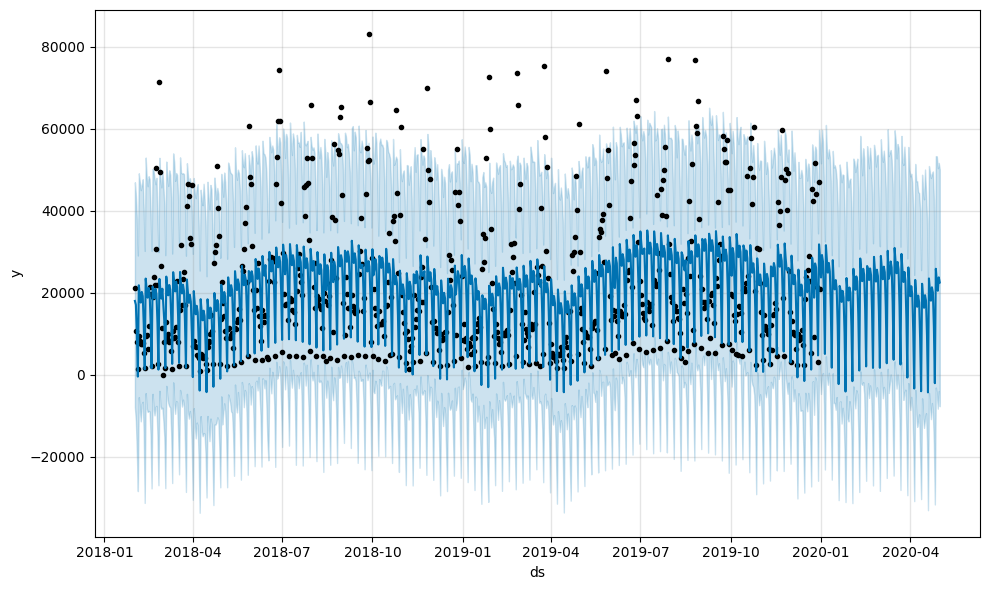

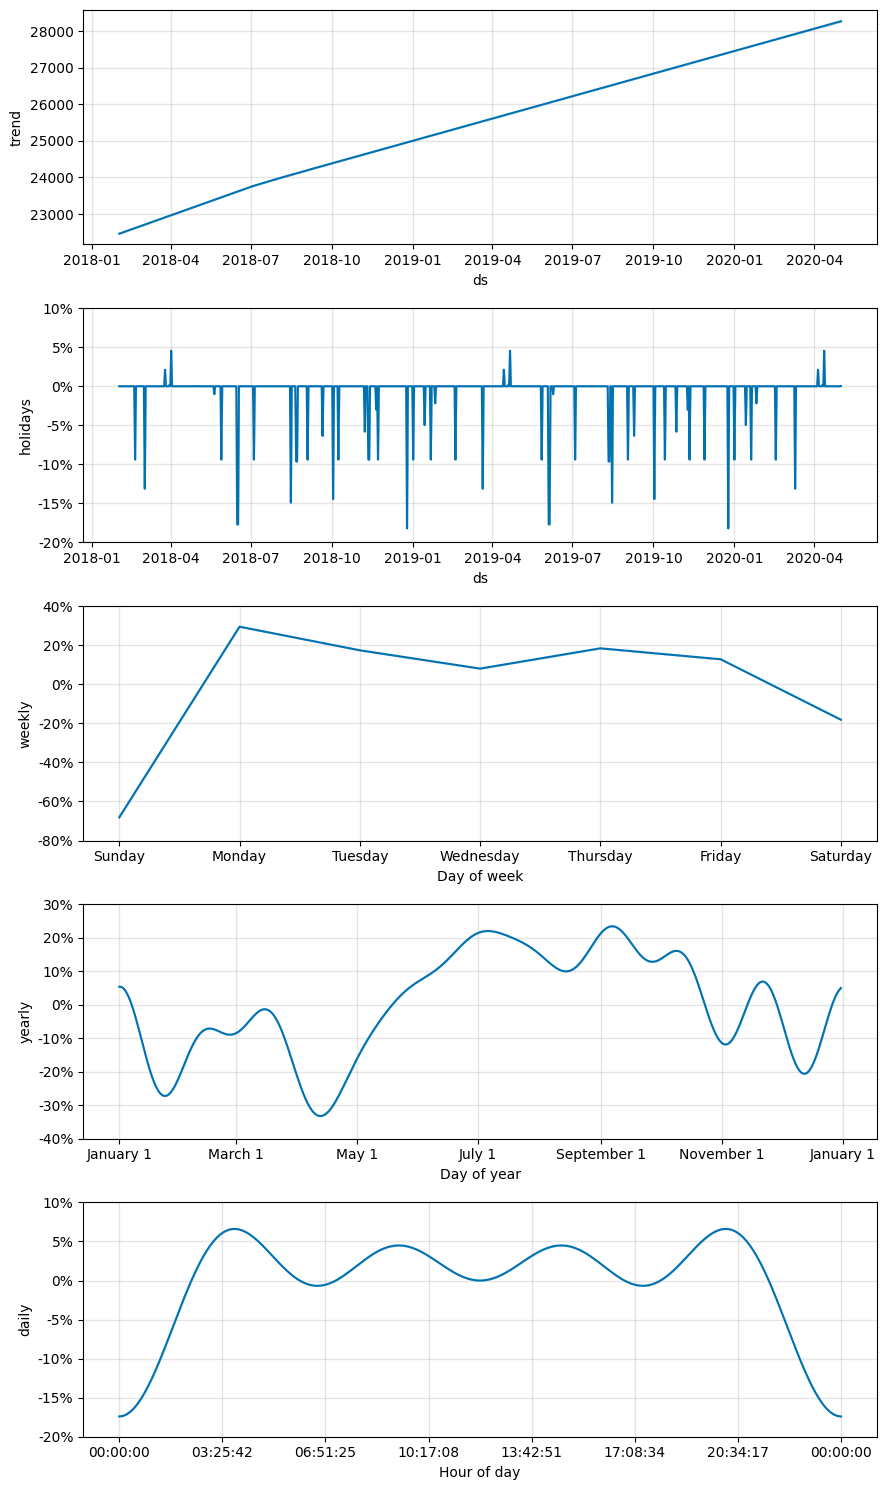

In [ ]:
future = final_model.make_future_dataframe(periods=122, freq='D')
forecast = final_model.predict(future)

# Plot the forecast
fig = final_model.plot(forecast)
fig.show()

# Plot the forecast components
fig_components = final_model.plot_components(forecast)
fig_components.show()
